## 1) importation des données

In [1]:
#encoding: utf-8
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
import seaborn as sns
import time
import os
import hdbscan
%pylab inline
sns.set()

Matplotlib is building the font cache using fc-list. This may take a moment.


Populating the interactive namespace from numpy and matplotlib


In [2]:
path = 'clustering-benchmark-master/src/main/resources/datasets/artificial/'
data_brutes = arff.loadarff(open(path+"2d-3c-no123.arff",'r'))[0] #spherical_4_3.arff
data = np.array([(x[0],x[1]) for x in data_brutes])

### Affichage

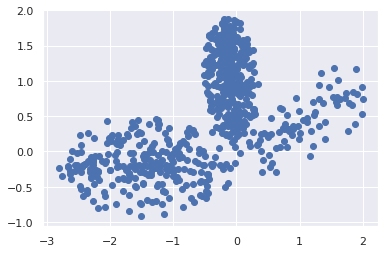

In [3]:
X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
plt.scatter(X,Y)

In [4]:
os.chdir("clustering-benchmark-master/src/main/resources/datasets/artificial")
os.getcwd()
Files = os.listdir()
for f in Files :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        #data_brutes = arff.loadarff(open(f,'r'))[0]    
        #X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        #plt.scatter(X,Y)
        #plt.show()

2d-10c.arff
2d-20c-no0.arff
2d-3c-no123.arff
2d-4c-no4.arff
2d-4c-no9.arff
2d-4c.arff
2dnormals.arff
2sp2glob.arff
3-spiral.arff
D31.arff
R15.arff
aggregation.arff
aml28.arff
atom.arff
banana.arff
birch-rg1.arff
birch-rg2.arff
birch-rg3.arff
blobs.arff
cassini.arff
chainlink.arff
circle.arff
cluto-t4-8k.arff
cluto-t5-8k.arff
cluto-t7-10k.arff
cluto-t8-8k.arff
complex8.arff
complex9.arff
compound.arff
cuboids.arff
cure-t0-2000n-2D.arff
cure-t1-2000n-2D.arff
cure-t2-4k.arff
curves1.arff
curves2.arff
dartboard1.arff
dartboard2.arff
dense-disk-3000.arff
dense-disk-5000.arff
diamond9.arff
disk-1000n.arff
disk-3000n.arff
disk-4000n.arff
disk-4500n.arff
disk-4600n.arff
disk-5000n.arff
disk-6000n.arff
donut1.arff
donut2.arff
donut3.arff
donutcurves.arff
dpb.arff
dpc.arff
ds2c2sc13.arff
ds3c3sc6.arff
ds4c2sc8.arff
elliptical_10_2.arff
elly-2d10c13s.arff
engytime.arff
flame.arff
fourty.arff
gaussians1.arff
golfball.arff
hepta.arff
hypercube.arff
impossible.arff
insect.arff
jain.arff
long1.arff
l

## 2) KMeans

In [5]:
KMeans(n_clusters=3, init='k-means++', random_state=0).fit(data)

KMeans(n_clusters=3, random_state=0)

In [7]:
for k in range(2,11):
    tps1 = time.time()
    i = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(data).n_iter_    
    tps2 = time.time()
    print("k =",k,", n_iter =",i, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

k = 2 , n_iter = 3 , runtime =  21.56 ms
k = 3 , n_iter = 5 , runtime =  30.09 ms
k = 4 , n_iter = 12 , runtime =  38.37 ms
k = 5 , n_iter = 6 , runtime =  49.85 ms
k = 6 , n_iter = 11 , runtime =  52.99 ms
k = 7 , n_iter = 13 , runtime =  56.53 ms
k = 8 , n_iter = 8 , runtime =  49.59 ms
k = 9 , n_iter = 17 , runtime =  59.11 ms
k = 10 , n_iter = 29 , runtime =  61.17 ms


In [8]:
#banana.arff, 2sp2glob.arff, 3-spiral.arff car non convexes

2d-10c.arff


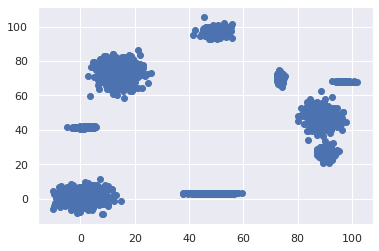

k = 2 , n_iter = 3 , runtime =  18.16 ms
k = 3 , n_iter = 5 , runtime =  28.21 ms
k = 4 , n_iter = 12 , runtime =  37.81 ms
k = 5 , n_iter = 6 , runtime =  48.87 ms
k = 6 , n_iter = 11 , runtime =  52.17 ms
k = 7 , n_iter = 13 , runtime =  55.99 ms
k = 8 , n_iter = 8 , runtime =  47.83 ms
k = 9 , n_iter = 17 , runtime =  54.0 ms
k = 10 , n_iter = 29 , runtime =  58.0 ms

2d-20c-no0.arff


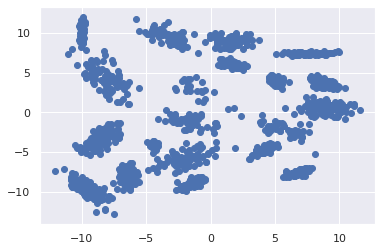

k = 2 , n_iter = 3 , runtime =  17.25 ms
k = 3 , n_iter = 5 , runtime =  27.7 ms
k = 4 , n_iter = 12 , runtime =  36.31 ms
k = 5 , n_iter = 6 , runtime =  48.75 ms
k = 6 , n_iter = 11 , runtime =  51.56 ms
k = 7 , n_iter = 13 , runtime =  55.71 ms
k = 8 , n_iter = 8 , runtime =  50.97 ms
k = 9 , n_iter = 17 , runtime =  56.11 ms
k = 10 , n_iter = 29 , runtime =  59.18 ms

2d-3c-no123.arff


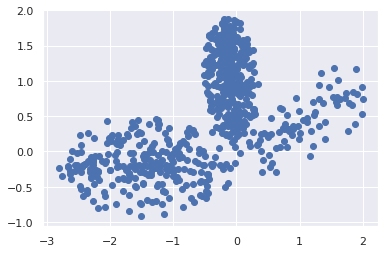

k = 2 , n_iter = 4 , runtime =  17.9 ms
k = 3 , n_iter = 5 , runtime =  29.08 ms
k = 4 , n_iter = 12 , runtime =  37.66 ms
k = 5 , n_iter = 6 , runtime =  48.93 ms
k = 6 , n_iter = 11 , runtime =  50.38 ms
k = 7 , n_iter = 13 , runtime =  55.67 ms
k = 8 , n_iter = 8 , runtime =  48.91 ms
k = 9 , n_iter = 17 , runtime =  54.24 ms
k = 10 , n_iter = 29 , runtime =  60.19 ms

2d-4c-no4.arff


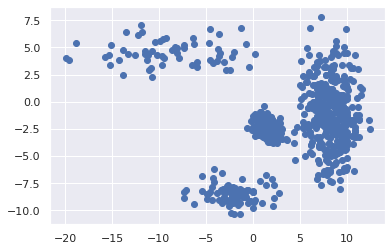

k = 2 , n_iter = 3 , runtime =  17.11 ms
k = 3 , n_iter = 5 , runtime =  28.09 ms
k = 4 , n_iter = 12 , runtime =  37.4 ms
k = 5 , n_iter = 6 , runtime =  48.36 ms
k = 6 , n_iter = 11 , runtime =  51.44 ms
k = 7 , n_iter = 13 , runtime =  55.3 ms
k = 8 , n_iter = 8 , runtime =  47.59 ms
k = 9 , n_iter = 17 , runtime =  55.01 ms
k = 10 , n_iter = 29 , runtime =  58.89 ms

2d-4c-no9.arff


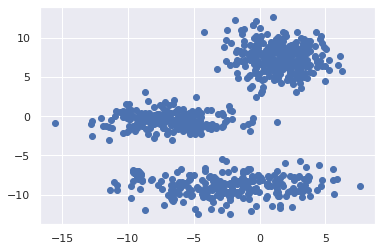

k = 2 , n_iter = 4 , runtime =  17.4 ms
k = 3 , n_iter = 5 , runtime =  32.5 ms
k = 4 , n_iter = 12 , runtime =  38.7 ms
k = 5 , n_iter = 6 , runtime =  47.84 ms
k = 6 , n_iter = 11 , runtime =  51.71 ms
k = 7 , n_iter = 13 , runtime =  56.58 ms
k = 8 , n_iter = 8 , runtime =  49.07 ms
k = 9 , n_iter = 17 , runtime =  55.27 ms
k = 10 , n_iter = 29 , runtime =  57.93 ms

2d-4c.arff


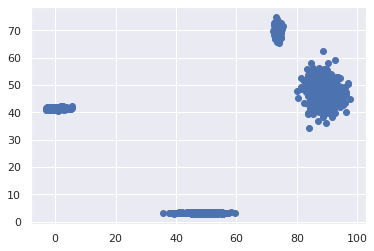

k = 2 , n_iter = 4 , runtime =  17.55 ms
k = 3 , n_iter = 5 , runtime =  29.3 ms
k = 4 , n_iter = 12 , runtime =  37.61 ms
k = 5 , n_iter = 6 , runtime =  48.97 ms
k = 6 , n_iter = 11 , runtime =  50.34 ms
k = 7 , n_iter = 13 , runtime =  54.75 ms
k = 8 , n_iter = 8 , runtime =  48.33 ms
k = 9 , n_iter = 17 , runtime =  55.43 ms
k = 10 , n_iter = 29 , runtime =  59.33 ms

2dnormals.arff


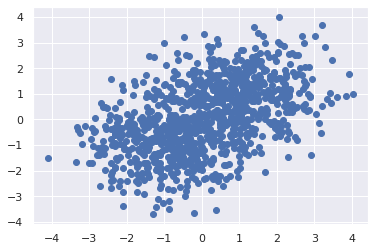

k = 2 , n_iter = 3 , runtime =  17.24 ms
k = 3 , n_iter = 5 , runtime =  29.23 ms
k = 4 , n_iter = 12 , runtime =  36.43 ms
k = 5 , n_iter = 6 , runtime =  47.47 ms
k = 6 , n_iter = 11 , runtime =  51.75 ms
k = 7 , n_iter = 13 , runtime =  58.5 ms
k = 8 , n_iter = 8 , runtime =  49.69 ms
k = 9 , n_iter = 17 , runtime =  55.15 ms
k = 10 , n_iter = 29 , runtime =  59.04 ms

2sp2glob.arff


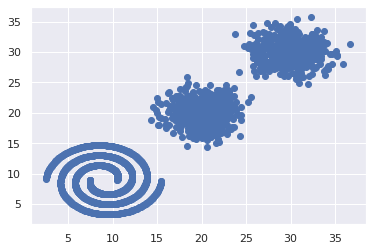

k = 2 , n_iter = 3 , runtime =  18.42 ms
k = 3 , n_iter = 5 , runtime =  30.81 ms
k = 4 , n_iter = 12 , runtime =  37.71 ms
k = 5 , n_iter = 6 , runtime =  47.96 ms
k = 6 , n_iter = 11 , runtime =  52.2 ms
k = 7 , n_iter = 13 , runtime =  55.73 ms
k = 8 , n_iter = 8 , runtime =  49.17 ms
k = 9 , n_iter = 17 , runtime =  55.35 ms
k = 10 , n_iter = 29 , runtime =  59.84 ms

3-spiral.arff


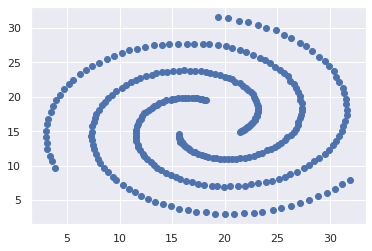

k = 2 , n_iter = 3 , runtime =  17.19 ms
k = 3 , n_iter = 5 , runtime =  29.32 ms
k = 4 , n_iter = 12 , runtime =  37.45 ms
k = 5 , n_iter = 6 , runtime =  47.83 ms
k = 6 , n_iter = 11 , runtime =  50.57 ms
k = 7 , n_iter = 13 , runtime =  55.64 ms
k = 8 , n_iter = 8 , runtime =  53.9 ms
k = 9 , n_iter = 17 , runtime =  59.24 ms
k = 10 , n_iter = 29 , runtime =  64.15 ms

D31.arff


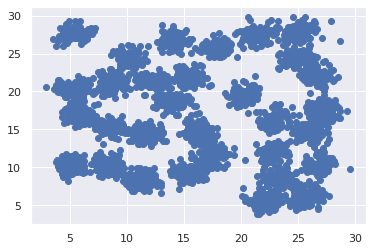

k = 2 , n_iter = 3 , runtime =  18.65 ms
k = 3 , n_iter = 5 , runtime =  29.73 ms
k = 4 , n_iter = 12 , runtime =  37.17 ms
k = 5 , n_iter = 6 , runtime =  48.55 ms
k = 6 , n_iter = 11 , runtime =  50.53 ms
k = 7 , n_iter = 13 , runtime =  55.01 ms
k = 8 , n_iter = 8 , runtime =  48.85 ms
k = 9 , n_iter = 17 , runtime =  55.25 ms
k = 10 , n_iter = 29 , runtime =  59.04 ms

R15.arff


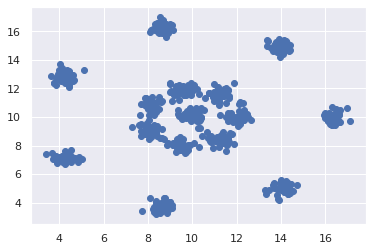

k = 2 , n_iter = 3 , runtime =  17.53 ms
k = 3 , n_iter = 5 , runtime =  28.1 ms
k = 4 , n_iter = 12 , runtime =  37.5 ms
k = 5 , n_iter = 6 , runtime =  48.95 ms
k = 6 , n_iter = 11 , runtime =  50.72 ms
k = 7 , n_iter = 13 , runtime =  56.23 ms
k = 8 , n_iter = 8 , runtime =  49.09 ms
k = 9 , n_iter = 17 , runtime =  55.17 ms
k = 10 , n_iter = 29 , runtime =  59.08 ms

aggregation.arff


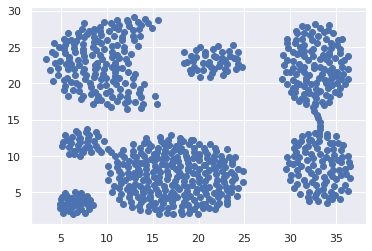

k = 2 , n_iter = 3 , runtime =  17.22 ms
k = 3 , n_iter = 5 , runtime =  27.98 ms
k = 4 , n_iter = 12 , runtime =  37.76 ms
k = 5 , n_iter = 6 , runtime =  48.8 ms
k = 6 , n_iter = 11 , runtime =  51.83 ms
k = 7 , n_iter = 13 , runtime =  55.84 ms
k = 8 , n_iter = 8 , runtime =  47.82 ms
k = 9 , n_iter = 17 , runtime =  57.04 ms
k = 10 , n_iter = 29 , runtime =  59.92 ms

aml28.arff


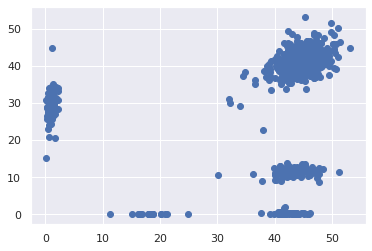

k = 2 , n_iter = 3 , runtime =  17.68 ms
k = 3 , n_iter = 5 , runtime =  29.57 ms
k = 4 , n_iter = 12 , runtime =  36.02 ms
k = 5 , n_iter = 6 , runtime =  48.28 ms
k = 6 , n_iter = 11 , runtime =  50.37 ms
k = 7 , n_iter = 13 , runtime =  55.11 ms
k = 8 , n_iter = 8 , runtime =  47.35 ms
k = 9 , n_iter = 17 , runtime =  55.48 ms
k = 10 , n_iter = 29 , runtime =  59.47 ms

atom.arff


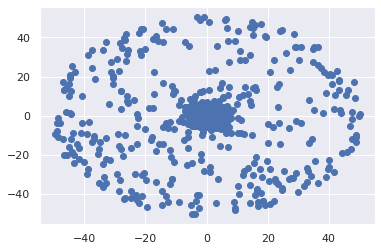

k = 2 , n_iter = 3 , runtime =  17.49 ms
k = 3 , n_iter = 5 , runtime =  28.53 ms
k = 4 , n_iter = 12 , runtime =  37.32 ms
k = 5 , n_iter = 6 , runtime =  47.01 ms
k = 6 , n_iter = 11 , runtime =  51.69 ms
k = 7 , n_iter = 13 , runtime =  55.36 ms
k = 8 , n_iter = 8 , runtime =  48.81 ms
k = 9 , n_iter = 17 , runtime =  54.96 ms
k = 10 , n_iter = 29 , runtime =  57.61 ms

banana.arff


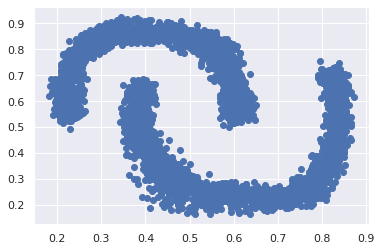

k = 2 , n_iter = 3 , runtime =  17.29 ms
k = 3 , n_iter = 5 , runtime =  27.85 ms
k = 4 , n_iter = 12 , runtime =  37.16 ms
k = 5 , n_iter = 6 , runtime =  49.38 ms
k = 6 , n_iter = 11 , runtime =  51.67 ms
k = 7 , n_iter = 13 , runtime =  55.7 ms
k = 8 , n_iter = 8 , runtime =  47.08 ms
k = 9 , n_iter = 17 , runtime =  59.66 ms
k = 10 , n_iter = 29 , runtime =  59.7 ms

birch-rg1.arff


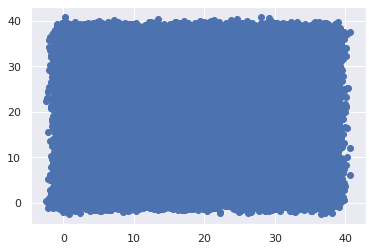

k = 2 , n_iter = 3 , runtime =  18.8 ms
k = 3 , n_iter = 5 , runtime =  29.72 ms
k = 4 , n_iter = 12 , runtime =  37.81 ms
k = 5 , n_iter = 6 , runtime =  48.89 ms
k = 6 , n_iter = 11 , runtime =  52.66 ms
k = 7 , n_iter = 13 , runtime =  56.4 ms
k = 8 , n_iter = 8 , runtime =  49.91 ms
k = 9 , n_iter = 17 , runtime =  55.86 ms
k = 10 , n_iter = 29 , runtime =  59.73 ms

birch-rg2.arff


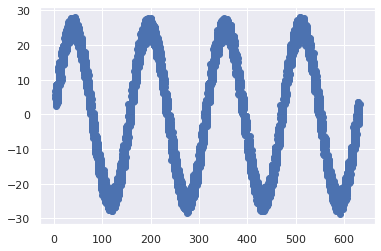

k = 2 , n_iter = 3 , runtime =  17.8 ms
k = 3 , n_iter = 5 , runtime =  28.02 ms
k = 4 , n_iter = 12 , runtime =  36.0 ms
k = 5 , n_iter = 6 , runtime =  48.81 ms
k = 6 , n_iter = 11 , runtime =  51.64 ms
k = 7 , n_iter = 13 , runtime =  55.48 ms
k = 8 , n_iter = 8 , runtime =  48.74 ms
k = 9 , n_iter = 17 , runtime =  54.4 ms
k = 10 , n_iter = 29 , runtime =  59.18 ms

birch-rg3.arff


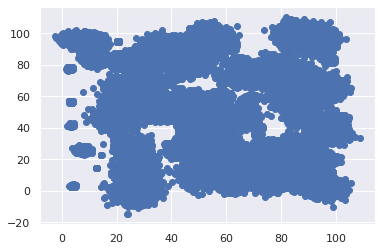

k = 2 , n_iter = 3 , runtime =  17.96 ms
k = 3 , n_iter = 5 , runtime =  29.26 ms
k = 4 , n_iter = 12 , runtime =  37.93 ms
k = 5 , n_iter = 6 , runtime =  49.82 ms
k = 6 , n_iter = 11 , runtime =  52.27 ms
k = 7 , n_iter = 13 , runtime =  55.63 ms
k = 8 , n_iter = 8 , runtime =  49.28 ms
k = 9 , n_iter = 17 , runtime =  55.99 ms
k = 10 , n_iter = 29 , runtime =  59.54 ms

blobs.arff


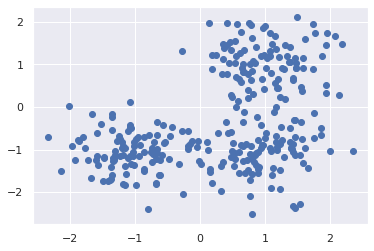

k = 2 , n_iter = 4 , runtime =  17.51 ms
k = 3 , n_iter = 5 , runtime =  29.0 ms
k = 4 , n_iter = 12 , runtime =  40.19 ms
k = 5 , n_iter = 6 , runtime =  48.97 ms
k = 6 , n_iter = 11 , runtime =  51.05 ms
k = 7 , n_iter = 13 , runtime =  56.16 ms
k = 8 , n_iter = 8 , runtime =  48.68 ms
k = 9 , n_iter = 17 , runtime =  54.84 ms
k = 10 , n_iter = 29 , runtime =  58.88 ms

cassini.arff


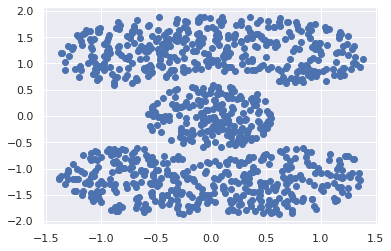

k = 2 , n_iter = 3 , runtime =  17.72 ms
k = 3 , n_iter = 5 , runtime =  29.13 ms
k = 4 , n_iter = 12 , runtime =  37.12 ms
k = 5 , n_iter = 6 , runtime =  48.3 ms
k = 6 , n_iter = 11 , runtime =  51.16 ms
k = 7 , n_iter = 13 , runtime =  55.4 ms
k = 8 , n_iter = 8 , runtime =  49.11 ms
k = 9 , n_iter = 17 , runtime =  55.69 ms
k = 10 , n_iter = 29 , runtime =  57.39 ms

chainlink.arff


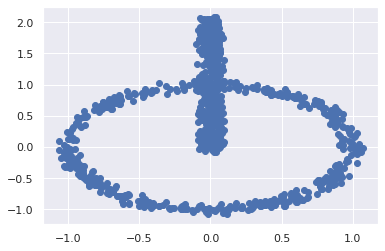

k = 2 , n_iter = 3 , runtime =  17.34 ms
k = 3 , n_iter = 5 , runtime =  29.07 ms
k = 4 , n_iter = 12 , runtime =  37.41 ms
k = 5 , n_iter = 6 , runtime =  48.64 ms
k = 6 , n_iter = 11 , runtime =  50.95 ms
k = 7 , n_iter = 13 , runtime =  54.65 ms
k = 8 , n_iter = 8 , runtime =  48.6 ms
k = 9 , n_iter = 17 , runtime =  55.13 ms
k = 10 , n_iter = 29 , runtime =  58.08 ms

circle.arff


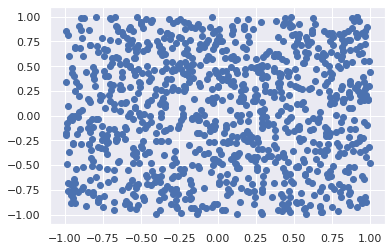

k = 2 , n_iter = 3 , runtime =  17.47 ms
k = 3 , n_iter = 5 , runtime =  29.31 ms
k = 4 , n_iter = 12 , runtime =  37.76 ms
k = 5 , n_iter = 6 , runtime =  48.84 ms
k = 6 , n_iter = 11 , runtime =  49.9 ms
k = 7 , n_iter = 13 , runtime =  52.98 ms
k = 8 , n_iter = 8 , runtime =  48.85 ms
k = 9 , n_iter = 17 , runtime =  55.35 ms
k = 10 , n_iter = 29 , runtime =  58.99 ms

cluto-t4-8k.arff


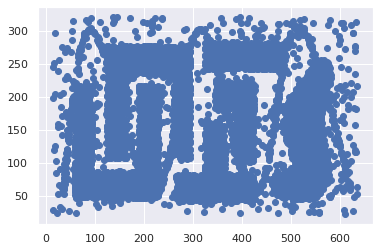

k = 2 , n_iter = 3 , runtime =  17.48 ms
k = 3 , n_iter = 5 , runtime =  29.03 ms
k = 4 , n_iter = 12 , runtime =  41.53 ms
k = 5 , n_iter = 6 , runtime =  49.68 ms
k = 6 , n_iter = 11 , runtime =  51.33 ms
k = 7 , n_iter = 13 , runtime =  56.18 ms
k = 8 , n_iter = 8 , runtime =  48.97 ms
k = 9 , n_iter = 17 , runtime =  54.96 ms
k = 10 , n_iter = 29 , runtime =  59.08 ms

cluto-t5-8k.arff


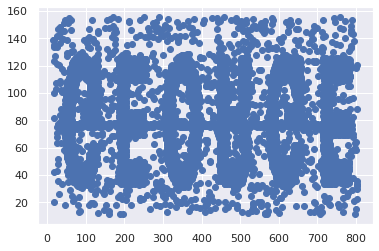

k = 2 , n_iter = 3 , runtime =  17.69 ms
k = 3 , n_iter = 5 , runtime =  28.06 ms
k = 4 , n_iter = 12 , runtime =  36.22 ms
k = 5 , n_iter = 6 , runtime =  47.0 ms
k = 6 , n_iter = 11 , runtime =  52.12 ms
k = 7 , n_iter = 13 , runtime =  53.41 ms
k = 8 , n_iter = 8 , runtime =  48.41 ms
k = 9 , n_iter = 17 , runtime =  52.87 ms
k = 10 , n_iter = 29 , runtime =  59.16 ms

cluto-t7-10k.arff


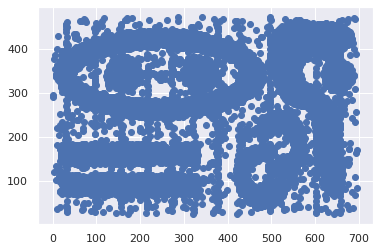

k = 2 , n_iter = 3 , runtime =  17.55 ms
k = 3 , n_iter = 5 , runtime =  28.98 ms
k = 4 , n_iter = 12 , runtime =  37.04 ms
k = 5 , n_iter = 6 , runtime =  47.1 ms
k = 6 , n_iter = 11 , runtime =  50.87 ms
k = 7 , n_iter = 13 , runtime =  54.93 ms
k = 8 , n_iter = 8 , runtime =  46.87 ms
k = 9 , n_iter = 17 , runtime =  54.21 ms
k = 10 , n_iter = 29 , runtime =  58.2 ms

cluto-t8-8k.arff


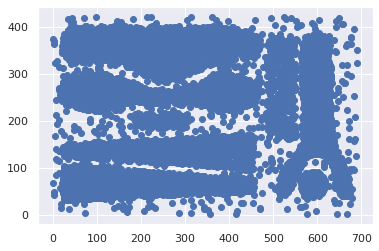

k = 2 , n_iter = 3 , runtime =  17.31 ms
k = 3 , n_iter = 5 , runtime =  27.86 ms
k = 4 , n_iter = 12 , runtime =  35.95 ms
k = 5 , n_iter = 6 , runtime =  46.81 ms
k = 6 , n_iter = 11 , runtime =  51.0 ms
k = 7 , n_iter = 13 , runtime =  54.86 ms
k = 8 , n_iter = 8 , runtime =  46.82 ms
k = 9 , n_iter = 17 , runtime =  53.4 ms
k = 10 , n_iter = 29 , runtime =  58.77 ms

complex8.arff


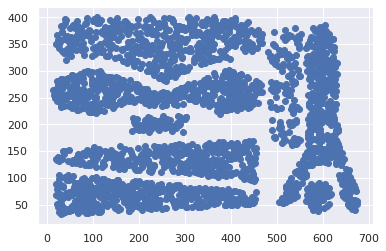

k = 2 , n_iter = 3 , runtime =  17.34 ms
k = 3 , n_iter = 5 , runtime =  30.58 ms
k = 4 , n_iter = 12 , runtime =  36.32 ms
k = 5 , n_iter = 6 , runtime =  48.38 ms
k = 6 , n_iter = 11 , runtime =  56.2 ms
k = 7 , n_iter = 13 , runtime =  59.2 ms
k = 8 , n_iter = 8 , runtime =  54.51 ms
k = 9 , n_iter = 17 , runtime =  59.7 ms
k = 10 , n_iter = 29 , runtime =  65.12 ms

complex9.arff


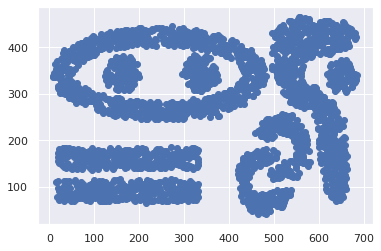

k = 2 , n_iter = 3 , runtime =  17.34 ms
k = 3 , n_iter = 5 , runtime =  27.93 ms
k = 4 , n_iter = 12 , runtime =  37.22 ms
k = 5 , n_iter = 6 , runtime =  48.09 ms
k = 6 , n_iter = 11 , runtime =  50.8 ms
k = 7 , n_iter = 13 , runtime =  54.67 ms
k = 8 , n_iter = 8 , runtime =  48.19 ms
k = 9 , n_iter = 17 , runtime =  54.34 ms
k = 10 , n_iter = 29 , runtime =  58.37 ms

compound.arff


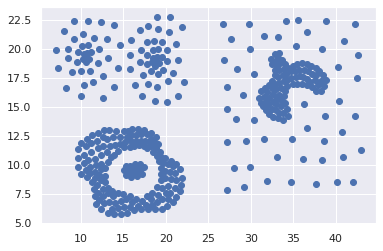

k = 2 , n_iter = 3 , runtime =  17.23 ms
k = 3 , n_iter = 5 , runtime =  27.51 ms
k = 4 , n_iter = 12 , runtime =  37.24 ms
k = 5 , n_iter = 6 , runtime =  47.75 ms
k = 6 , n_iter = 11 , runtime =  50.62 ms
k = 7 , n_iter = 13 , runtime =  54.6 ms
k = 8 , n_iter = 8 , runtime =  48.11 ms
k = 9 , n_iter = 17 , runtime =  54.85 ms
k = 10 , n_iter = 29 , runtime =  58.67 ms

cuboids.arff


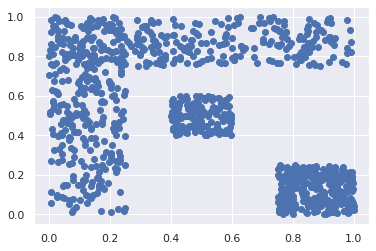

k = 2 , n_iter = 3 , runtime =  17.47 ms
k = 3 , n_iter = 5 , runtime =  28.82 ms
k = 4 , n_iter = 12 , runtime =  35.79 ms
k = 5 , n_iter = 6 , runtime =  48.12 ms
k = 6 , n_iter = 11 , runtime =  50.81 ms
k = 7 , n_iter = 13 , runtime =  53.89 ms
k = 8 , n_iter = 8 , runtime =  48.12 ms
k = 9 , n_iter = 17 , runtime =  53.48 ms
k = 10 , n_iter = 29 , runtime =  58.35 ms

cure-t0-2000n-2D.arff


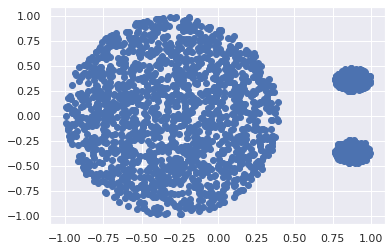

k = 2 , n_iter = 3 , runtime =  17.54 ms
k = 3 , n_iter = 5 , runtime =  29.24 ms
k = 4 , n_iter = 12 , runtime =  36.93 ms
k = 5 , n_iter = 6 , runtime =  48.44 ms
k = 6 , n_iter = 11 , runtime =  50.64 ms
k = 7 , n_iter = 13 , runtime =  55.09 ms
k = 8 , n_iter = 8 , runtime =  49.27 ms
k = 9 , n_iter = 17 , runtime =  53.42 ms
k = 10 , n_iter = 29 , runtime =  58.88 ms

cure-t1-2000n-2D.arff


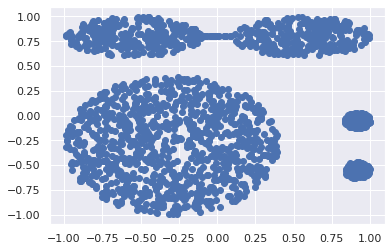

k = 2 , n_iter = 3 , runtime =  17.13 ms
k = 3 , n_iter = 5 , runtime =  28.84 ms
k = 4 , n_iter = 12 , runtime =  37.07 ms
k = 5 , n_iter = 6 , runtime =  47.6 ms
k = 6 , n_iter = 11 , runtime =  50.21 ms
k = 7 , n_iter = 13 , runtime =  55.08 ms
k = 8 , n_iter = 8 , runtime =  47.46 ms
k = 9 , n_iter = 17 , runtime =  54.47 ms
k = 10 , n_iter = 29 , runtime =  57.27 ms

cure-t2-4k.arff


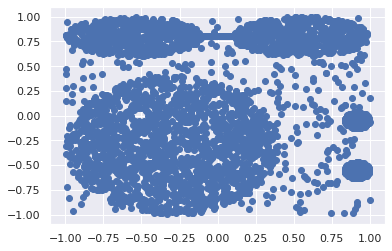

k = 2 , n_iter = 3 , runtime =  17.15 ms
k = 3 , n_iter = 5 , runtime =  29.01 ms
k = 4 , n_iter = 12 , runtime =  35.9 ms
k = 5 , n_iter = 6 , runtime =  48.22 ms
k = 6 , n_iter = 11 , runtime =  50.98 ms
k = 7 , n_iter = 13 , runtime =  54.78 ms
k = 8 , n_iter = 8 , runtime =  48.43 ms
k = 9 , n_iter = 17 , runtime =  56.13 ms
k = 10 , n_iter = 29 , runtime =  57.94 ms

curves1.arff


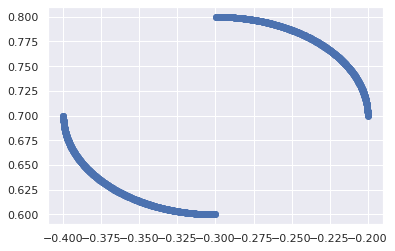

k = 2 , n_iter = 3 , runtime =  17.31 ms
k = 3 , n_iter = 5 , runtime =  30.16 ms
k = 4 , n_iter = 12 , runtime =  37.21 ms
k = 5 , n_iter = 6 , runtime =  48.45 ms
k = 6 , n_iter = 11 , runtime =  50.87 ms
k = 7 , n_iter = 13 , runtime =  54.9 ms
k = 8 , n_iter = 8 , runtime =  48.27 ms
k = 9 , n_iter = 17 , runtime =  53.31 ms
k = 10 , n_iter = 29 , runtime =  58.53 ms

curves2.arff


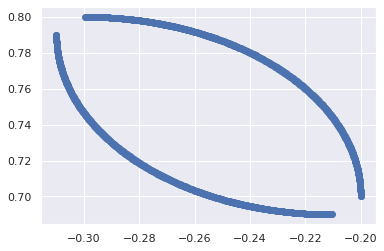

k = 2 , n_iter = 3 , runtime =  17.1 ms
k = 3 , n_iter = 5 , runtime =  27.58 ms
k = 4 , n_iter = 12 , runtime =  37.07 ms
k = 5 , n_iter = 6 , runtime =  48.1 ms
k = 6 , n_iter = 11 , runtime =  50.34 ms
k = 7 , n_iter = 13 , runtime =  55.0 ms
k = 8 , n_iter = 8 , runtime =  48.13 ms
k = 9 , n_iter = 17 , runtime =  54.57 ms
k = 10 , n_iter = 29 , runtime =  58.38 ms

dartboard1.arff


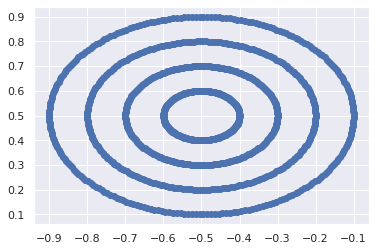

k = 2 , n_iter = 3 , runtime =  17.07 ms
k = 3 , n_iter = 5 , runtime =  27.36 ms
k = 4 , n_iter = 12 , runtime =  36.88 ms
k = 5 , n_iter = 6 , runtime =  47.96 ms
k = 6 , n_iter = 11 , runtime =  50.5 ms
k = 7 , n_iter = 13 , runtime =  56.46 ms
k = 8 , n_iter = 8 , runtime =  47.97 ms
k = 9 , n_iter = 17 , runtime =  53.66 ms
k = 10 , n_iter = 29 , runtime =  57.97 ms

dartboard2.arff


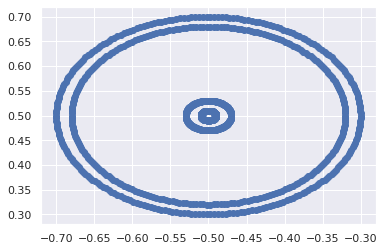

k = 2 , n_iter = 3 , runtime =  17.05 ms
k = 3 , n_iter = 5 , runtime =  29.14 ms
k = 4 , n_iter = 12 , runtime =  35.95 ms
k = 5 , n_iter = 6 , runtime =  46.21 ms
k = 6 , n_iter = 11 , runtime =  50.54 ms
k = 7 , n_iter = 13 , runtime =  53.88 ms
k = 8 , n_iter = 8 , runtime =  49.37 ms
k = 9 , n_iter = 17 , runtime =  54.23 ms
k = 10 , n_iter = 29 , runtime =  56.97 ms

dense-disk-3000.arff


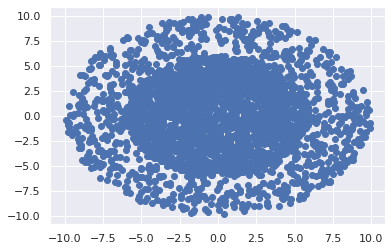

k = 2 , n_iter = 3 , runtime =  17.38 ms
k = 3 , n_iter = 5 , runtime =  29.03 ms
k = 4 , n_iter = 12 , runtime =  37.3 ms
k = 5 , n_iter = 6 , runtime =  48.27 ms
k = 6 , n_iter = 11 , runtime =  50.61 ms
k = 7 , n_iter = 13 , runtime =  54.1 ms
k = 8 , n_iter = 8 , runtime =  48.12 ms
k = 9 , n_iter = 17 , runtime =  54.04 ms
k = 10 , n_iter = 29 , runtime =  57.33 ms

dense-disk-5000.arff


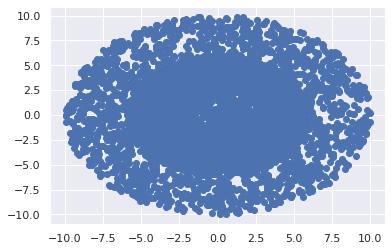

k = 2 , n_iter = 4 , runtime =  17.27 ms
k = 3 , n_iter = 5 , runtime =  28.83 ms
k = 4 , n_iter = 12 , runtime =  35.88 ms
k = 5 , n_iter = 6 , runtime =  47.77 ms
k = 6 , n_iter = 11 , runtime =  49.61 ms
k = 7 , n_iter = 13 , runtime =  54.47 ms
k = 8 , n_iter = 8 , runtime =  48.0 ms
k = 9 , n_iter = 17 , runtime =  55.21 ms
k = 10 , n_iter = 29 , runtime =  58.87 ms

diamond9.arff


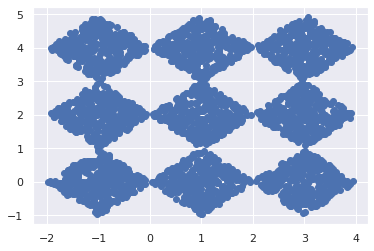

k = 2 , n_iter = 3 , runtime =  17.29 ms
k = 3 , n_iter = 5 , runtime =  29.04 ms
k = 4 , n_iter = 12 , runtime =  35.99 ms
k = 5 , n_iter = 6 , runtime =  47.83 ms
k = 6 , n_iter = 11 , runtime =  50.69 ms
k = 7 , n_iter = 13 , runtime =  54.76 ms
k = 8 , n_iter = 8 , runtime =  48.19 ms
k = 9 , n_iter = 17 , runtime =  53.93 ms
k = 10 , n_iter = 29 , runtime =  58.85 ms

disk-1000n.arff


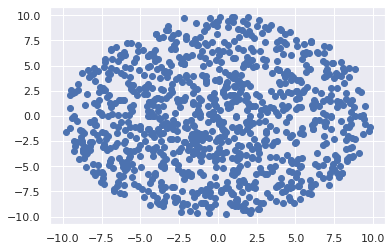

k = 2 , n_iter = 4 , runtime =  17.39 ms
k = 3 , n_iter = 5 , runtime =  29.12 ms
k = 4 , n_iter = 12 , runtime =  37.7 ms
k = 5 , n_iter = 6 , runtime =  48.21 ms
k = 6 , n_iter = 11 , runtime =  50.76 ms
k = 7 , n_iter = 13 , runtime =  54.35 ms
k = 8 , n_iter = 8 , runtime =  47.79 ms
k = 9 , n_iter = 17 , runtime =  54.06 ms
k = 10 , n_iter = 29 , runtime =  57.97 ms

disk-3000n.arff


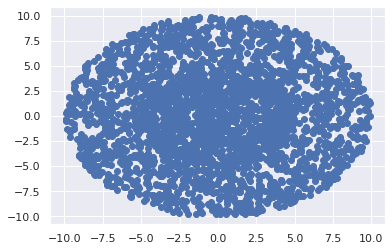

k = 2 , n_iter = 3 , runtime =  16.95 ms
k = 3 , n_iter = 5 , runtime =  28.98 ms
k = 4 , n_iter = 12 , runtime =  37.04 ms
k = 5 , n_iter = 6 , runtime =  48.7 ms
k = 6 , n_iter = 11 , runtime =  50.97 ms
k = 7 , n_iter = 13 , runtime =  53.46 ms
k = 8 , n_iter = 8 , runtime =  48.24 ms
k = 9 , n_iter = 17 , runtime =  54.4 ms
k = 10 , n_iter = 29 , runtime =  58.07 ms

disk-4000n.arff


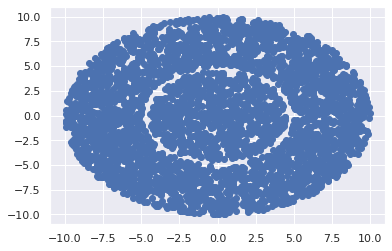

k = 2 , n_iter = 3 , runtime =  17.36 ms
k = 3 , n_iter = 5 , runtime =  29.27 ms
k = 4 , n_iter = 12 , runtime =  37.19 ms
k = 5 , n_iter = 6 , runtime =  46.86 ms
k = 6 , n_iter = 11 , runtime =  50.76 ms
k = 7 , n_iter = 13 , runtime =  55.61 ms
k = 8 , n_iter = 8 , runtime =  46.8 ms
k = 9 , n_iter = 17 , runtime =  54.52 ms
k = 10 , n_iter = 29 , runtime =  58.16 ms

disk-4500n.arff


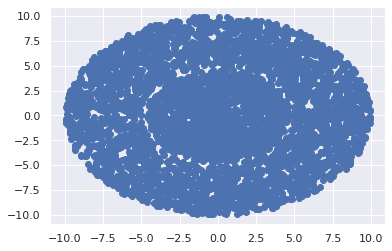

k = 2 , n_iter = 3 , runtime =  17.33 ms
k = 3 , n_iter = 5 , runtime =  29.04 ms
k = 4 , n_iter = 12 , runtime =  37.83 ms
k = 5 , n_iter = 6 , runtime =  48.22 ms
k = 6 , n_iter = 11 , runtime =  50.67 ms
k = 7 , n_iter = 13 , runtime =  55.31 ms
k = 8 , n_iter = 8 , runtime =  48.53 ms
k = 9 , n_iter = 17 , runtime =  53.91 ms
k = 10 , n_iter = 29 , runtime =  56.92 ms

disk-4600n.arff


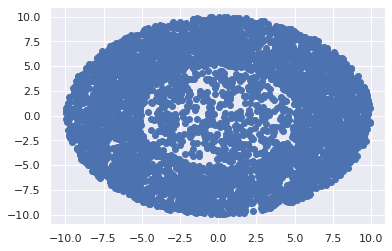

k = 2 , n_iter = 3 , runtime =  17.48 ms
k = 3 , n_iter = 5 , runtime =  27.26 ms
k = 4 , n_iter = 12 , runtime =  36.76 ms
k = 5 , n_iter = 6 , runtime =  47.3 ms
k = 6 , n_iter = 11 , runtime =  50.39 ms
k = 7 , n_iter = 13 , runtime =  55.04 ms
k = 8 , n_iter = 8 , runtime =  47.96 ms
k = 9 , n_iter = 17 , runtime =  54.27 ms
k = 10 , n_iter = 29 , runtime =  58.27 ms

disk-5000n.arff


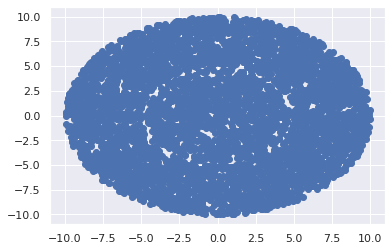

k = 2 , n_iter = 3 , runtime =  17.26 ms
k = 3 , n_iter = 5 , runtime =  28.74 ms
k = 4 , n_iter = 12 , runtime =  37.45 ms
k = 5 , n_iter = 6 , runtime =  48.53 ms
k = 6 , n_iter = 11 , runtime =  50.23 ms
k = 7 , n_iter = 13 , runtime =  54.54 ms
k = 8 , n_iter = 8 , runtime =  47.51 ms
k = 9 , n_iter = 17 , runtime =  54.75 ms
k = 10 , n_iter = 29 , runtime =  57.1 ms

disk-6000n.arff


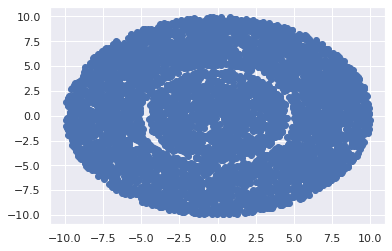

k = 2 , n_iter = 3 , runtime =  17.0 ms
k = 3 , n_iter = 5 , runtime =  29.22 ms
k = 4 , n_iter = 12 , runtime =  36.66 ms
k = 5 , n_iter = 6 , runtime =  47.96 ms
k = 6 , n_iter = 11 , runtime =  50.43 ms
k = 7 , n_iter = 13 , runtime =  55.01 ms
k = 8 , n_iter = 8 , runtime =  47.92 ms
k = 9 , n_iter = 17 , runtime =  52.95 ms
k = 10 , n_iter = 29 , runtime =  58.05 ms

donut1.arff


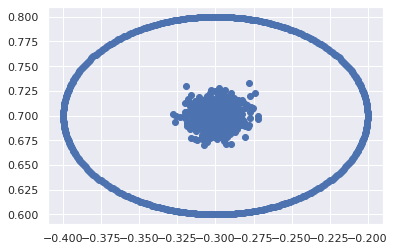

k = 2 , n_iter = 3 , runtime =  17.18 ms
k = 3 , n_iter = 5 , runtime =  28.86 ms
k = 4 , n_iter = 12 , runtime =  36.77 ms
k = 5 , n_iter = 6 , runtime =  47.84 ms
k = 6 , n_iter = 11 , runtime =  50.35 ms
k = 7 , n_iter = 13 , runtime =  54.79 ms
k = 8 , n_iter = 8 , runtime =  46.84 ms
k = 9 , n_iter = 17 , runtime =  53.9 ms
k = 10 , n_iter = 29 , runtime =  56.71 ms

donut2.arff


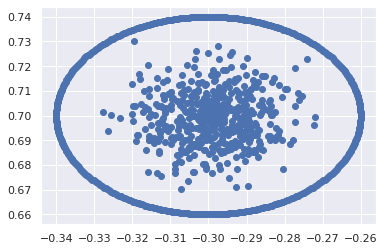

k = 2 , n_iter = 3 , runtime =  17.53 ms
k = 3 , n_iter = 5 , runtime =  28.75 ms
k = 4 , n_iter = 12 , runtime =  36.02 ms
k = 5 , n_iter = 6 , runtime =  48.08 ms
k = 6 , n_iter = 11 , runtime =  52.01 ms
k = 7 , n_iter = 13 , runtime =  54.44 ms
k = 8 , n_iter = 8 , runtime =  48.34 ms
k = 9 , n_iter = 17 , runtime =  54.77 ms
k = 10 , n_iter = 29 , runtime =  58.78 ms

donut3.arff


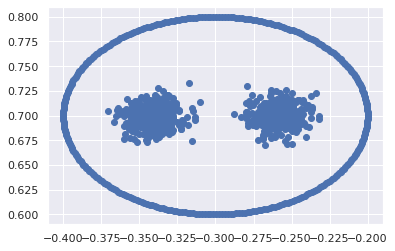

k = 2 , n_iter = 3 , runtime =  17.28 ms
k = 3 , n_iter = 5 , runtime =  28.4 ms
k = 4 , n_iter = 12 , runtime =  37.7 ms
k = 5 , n_iter = 6 , runtime =  50.15 ms
k = 6 , n_iter = 11 , runtime =  53.58 ms
k = 7 , n_iter = 13 , runtime =  56.69 ms
k = 8 , n_iter = 8 , runtime =  50.8 ms
k = 9 , n_iter = 17 , runtime =  56.86 ms
k = 10 , n_iter = 29 , runtime =  61.11 ms

donutcurves.arff


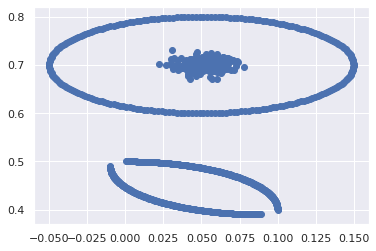

k = 2 , n_iter = 3 , runtime =  16.99 ms
k = 3 , n_iter = 5 , runtime =  27.5 ms
k = 4 , n_iter = 12 , runtime =  35.57 ms
k = 5 , n_iter = 6 , runtime =  48.31 ms
k = 6 , n_iter = 11 , runtime =  50.21 ms
k = 7 , n_iter = 13 , runtime =  53.41 ms
k = 8 , n_iter = 8 , runtime =  47.21 ms
k = 9 , n_iter = 17 , runtime =  55.4 ms
k = 10 , n_iter = 29 , runtime =  61.95 ms

dpb.arff


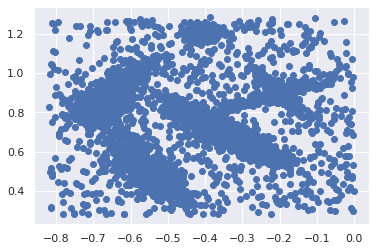

k = 2 , n_iter = 3 , runtime =  20.04 ms
k = 3 , n_iter = 5 , runtime =  29.44 ms
k = 4 , n_iter = 12 , runtime =  39.09 ms
k = 5 , n_iter = 6 , runtime =  49.48 ms
k = 6 , n_iter = 11 , runtime =  51.23 ms
k = 7 , n_iter = 13 , runtime =  55.16 ms
k = 8 , n_iter = 8 , runtime =  47.82 ms
k = 9 , n_iter = 17 , runtime =  54.97 ms
k = 10 , n_iter = 29 , runtime =  58.36 ms

dpc.arff


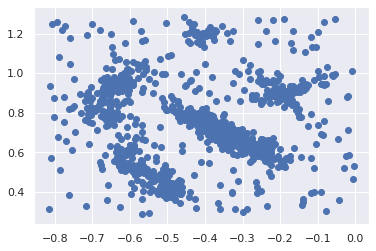

k = 2 , n_iter = 3 , runtime =  17.21 ms
k = 3 , n_iter = 5 , runtime =  29.39 ms
k = 4 , n_iter = 12 , runtime =  37.24 ms
k = 5 , n_iter = 6 , runtime =  48.47 ms
k = 6 , n_iter = 11 , runtime =  50.97 ms
k = 7 , n_iter = 13 , runtime =  54.97 ms
k = 8 , n_iter = 8 , runtime =  48.2 ms
k = 9 , n_iter = 17 , runtime =  54.68 ms
k = 10 , n_iter = 29 , runtime =  58.48 ms

ds2c2sc13.arff


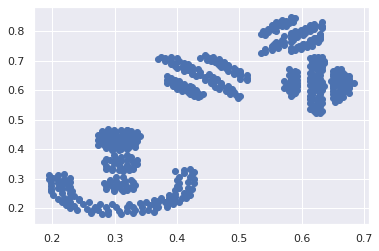

k = 2 , n_iter = 3 , runtime =  17.28 ms
k = 3 , n_iter = 5 , runtime =  28.45 ms
k = 4 , n_iter = 12 , runtime =  37.09 ms
k = 5 , n_iter = 6 , runtime =  48.29 ms
k = 6 , n_iter = 11 , runtime =  50.6 ms
k = 7 , n_iter = 13 , runtime =  55.26 ms
k = 8 , n_iter = 8 , runtime =  47.13 ms
k = 9 , n_iter = 17 , runtime =  55.07 ms
k = 10 , n_iter = 29 , runtime =  59.05 ms

ds3c3sc6.arff


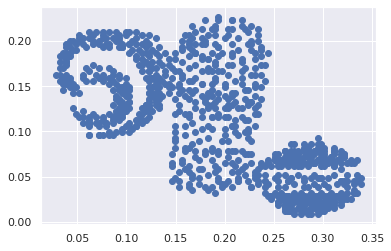

k = 2 , n_iter = 3 , runtime =  17.65 ms
k = 3 , n_iter = 5 , runtime =  28.01 ms
k = 4 , n_iter = 12 , runtime =  36.9 ms
k = 5 , n_iter = 6 , runtime =  47.9 ms
k = 6 , n_iter = 11 , runtime =  50.31 ms
k = 7 , n_iter = 13 , runtime =  54.54 ms
k = 8 , n_iter = 8 , runtime =  46.94 ms
k = 9 , n_iter = 17 , runtime =  53.85 ms
k = 10 , n_iter = 29 , runtime =  58.14 ms

ds4c2sc8.arff


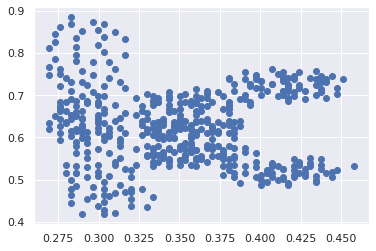

k = 2 , n_iter = 3 , runtime =  17.31 ms
k = 3 , n_iter = 5 , runtime =  27.65 ms
k = 4 , n_iter = 12 , runtime =  36.73 ms
k = 5 , n_iter = 6 , runtime =  47.9 ms
k = 6 , n_iter = 11 , runtime =  51.08 ms
k = 7 , n_iter = 13 , runtime =  54.53 ms
k = 8 , n_iter = 8 , runtime =  48.28 ms
k = 9 , n_iter = 17 , runtime =  54.4 ms
k = 10 , n_iter = 29 , runtime =  57.96 ms

elliptical_10_2.arff


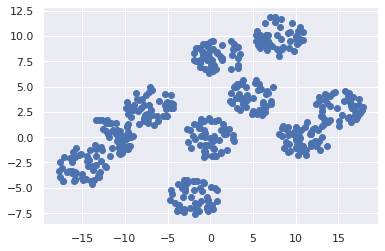

k = 2 , n_iter = 4 , runtime =  17.12 ms
k = 3 , n_iter = 5 , runtime =  27.93 ms
k = 4 , n_iter = 12 , runtime =  37.07 ms
k = 5 , n_iter = 6 , runtime =  47.84 ms
k = 6 , n_iter = 11 , runtime =  50.45 ms
k = 7 , n_iter = 13 , runtime =  54.93 ms
k = 8 , n_iter = 8 , runtime =  48.38 ms
k = 9 , n_iter = 17 , runtime =  53.45 ms
k = 10 , n_iter = 29 , runtime =  58.42 ms

elly-2d10c13s.arff


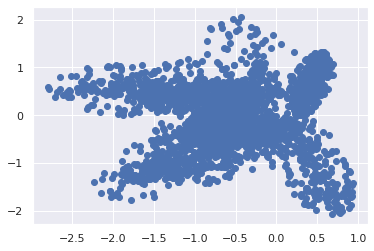

k = 2 , n_iter = 3 , runtime =  17.84 ms
k = 3 , n_iter = 5 , runtime =  29.13 ms
k = 4 , n_iter = 12 , runtime =  37.4 ms
k = 5 , n_iter = 6 , runtime =  48.21 ms
k = 6 , n_iter = 11 , runtime =  50.5 ms
k = 7 , n_iter = 13 , runtime =  55.46 ms
k = 8 , n_iter = 8 , runtime =  46.7 ms
k = 9 , n_iter = 17 , runtime =  54.68 ms
k = 10 , n_iter = 29 , runtime =  56.91 ms

engytime.arff


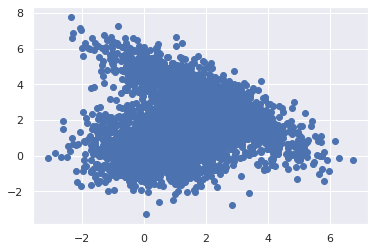

k = 2 , n_iter = 3 , runtime =  16.93 ms
k = 3 , n_iter = 5 , runtime =  29.0 ms
k = 4 , n_iter = 12 , runtime =  36.71 ms
k = 5 , n_iter = 6 , runtime =  47.4 ms
k = 6 , n_iter = 11 , runtime =  50.22 ms
k = 7 , n_iter = 13 , runtime =  54.22 ms
k = 8 , n_iter = 8 , runtime =  47.7 ms
k = 9 , n_iter = 17 , runtime =  54.06 ms
k = 10 , n_iter = 29 , runtime =  56.64 ms

flame.arff


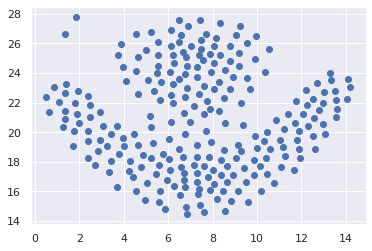

k = 2 , n_iter = 3 , runtime =  17.73 ms
k = 3 , n_iter = 5 , runtime =  29.17 ms
k = 4 , n_iter = 12 , runtime =  36.88 ms
k = 5 , n_iter = 6 , runtime =  47.43 ms
k = 6 , n_iter = 11 , runtime =  50.41 ms
k = 7 , n_iter = 13 , runtime =  54.25 ms
k = 8 , n_iter = 8 , runtime =  48.09 ms
k = 9 , n_iter = 17 , runtime =  53.11 ms
k = 10 , n_iter = 29 , runtime =  59.87 ms

fourty.arff


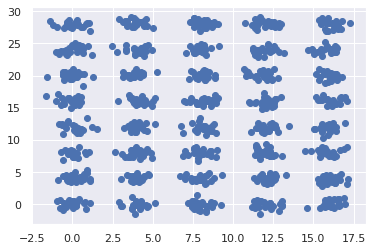

k = 2 , n_iter = 3 , runtime =  17.07 ms
k = 3 , n_iter = 5 , runtime =  28.61 ms
k = 4 , n_iter = 12 , runtime =  36.73 ms
k = 5 , n_iter = 6 , runtime =  46.99 ms
k = 6 , n_iter = 11 , runtime =  50.49 ms
k = 7 , n_iter = 13 , runtime =  53.18 ms
k = 8 , n_iter = 8 , runtime =  48.26 ms
k = 9 , n_iter = 17 , runtime =  54.21 ms
k = 10 , n_iter = 29 , runtime =  58.28 ms

gaussians1.arff


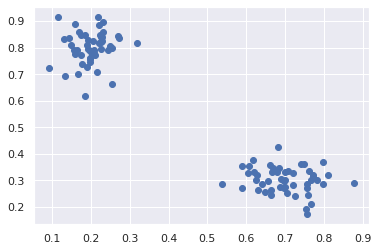

k = 2 , n_iter = 3 , runtime =  17.08 ms
k = 3 , n_iter = 5 , runtime =  27.84 ms
k = 4 , n_iter = 12 , runtime =  37.06 ms
k = 5 , n_iter = 6 , runtime =  47.7 ms
k = 6 , n_iter = 11 , runtime =  49.36 ms
k = 7 , n_iter = 13 , runtime =  56.72 ms
k = 8 , n_iter = 8 , runtime =  46.99 ms
k = 9 , n_iter = 17 , runtime =  53.06 ms
k = 10 , n_iter = 29 , runtime =  58.02 ms

golfball.arff


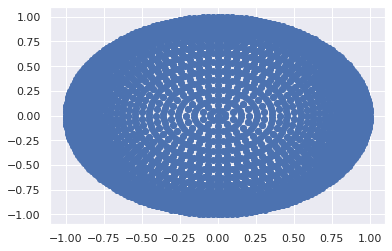

k = 2 , n_iter = 3 , runtime =  17.47 ms
k = 3 , n_iter = 5 , runtime =  28.58 ms
k = 4 , n_iter = 12 , runtime =  36.71 ms
k = 5 , n_iter = 6 , runtime =  47.35 ms
k = 6 , n_iter = 11 , runtime =  50.22 ms
k = 7 , n_iter = 13 , runtime =  53.96 ms
k = 8 , n_iter = 8 , runtime =  47.85 ms
k = 9 , n_iter = 17 , runtime =  53.98 ms
k = 10 , n_iter = 29 , runtime =  57.04 ms

hepta.arff


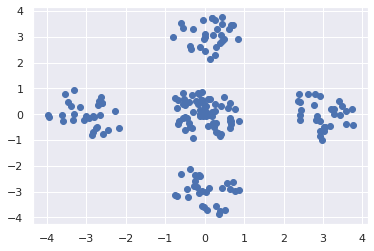

k = 2 , n_iter = 3 , runtime =  17.22 ms
k = 3 , n_iter = 5 , runtime =  27.37 ms
k = 4 , n_iter = 12 , runtime =  36.99 ms
k = 5 , n_iter = 6 , runtime =  47.96 ms
k = 6 , n_iter = 11 , runtime =  49.12 ms
k = 7 , n_iter = 13 , runtime =  54.01 ms
k = 8 , n_iter = 8 , runtime =  47.46 ms
k = 9 , n_iter = 17 , runtime =  54.08 ms
k = 10 , n_iter = 29 , runtime =  58.1 ms

hypercube.arff


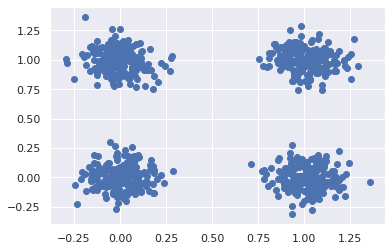

k = 2 , n_iter = 3 , runtime =  16.9 ms
k = 3 , n_iter = 5 , runtime =  28.05 ms
k = 4 , n_iter = 12 , runtime =  37.36 ms
k = 5 , n_iter = 6 , runtime =  47.87 ms
k = 6 , n_iter = 11 , runtime =  50.64 ms
k = 7 , n_iter = 13 , runtime =  53.78 ms
k = 8 , n_iter = 8 , runtime =  48.15 ms
k = 9 , n_iter = 17 , runtime =  53.17 ms
k = 10 , n_iter = 29 , runtime =  59.38 ms

impossible.arff


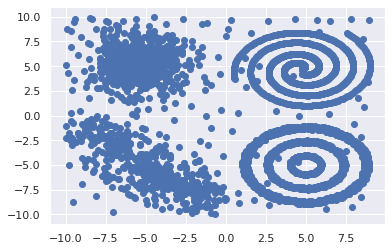

k = 2 , n_iter = 3 , runtime =  17.3 ms
k = 3 , n_iter = 5 , runtime =  28.78 ms
k = 4 , n_iter = 12 , runtime =  35.62 ms
k = 5 , n_iter = 6 , runtime =  47.94 ms
k = 6 , n_iter = 11 , runtime =  50.32 ms
k = 7 , n_iter = 13 , runtime =  53.72 ms
k = 8 , n_iter = 8 , runtime =  47.11 ms
k = 9 , n_iter = 17 , runtime =  53.29 ms
k = 10 , n_iter = 29 , runtime =  57.59 ms

insect.arff


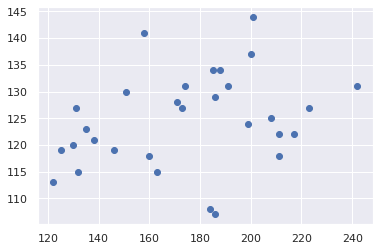

k = 2 , n_iter = 3 , runtime =  17.17 ms
k = 3 , n_iter = 5 , runtime =  27.81 ms
k = 4 , n_iter = 12 , runtime =  36.9 ms
k = 5 , n_iter = 6 , runtime =  47.69 ms
k = 6 , n_iter = 11 , runtime =  50.75 ms
k = 7 , n_iter = 13 , runtime =  55.06 ms
k = 8 , n_iter = 8 , runtime =  47.78 ms
k = 9 , n_iter = 17 , runtime =  52.98 ms
k = 10 , n_iter = 29 , runtime =  57.86 ms

jain.arff


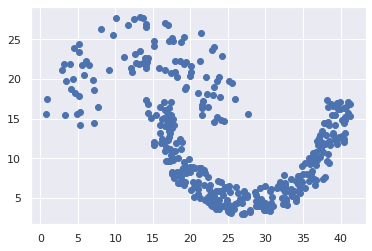

k = 2 , n_iter = 3 , runtime =  17.38 ms
k = 3 , n_iter = 5 , runtime =  28.77 ms
k = 4 , n_iter = 12 , runtime =  36.9 ms
k = 5 , n_iter = 6 , runtime =  48.22 ms
k = 6 , n_iter = 11 , runtime =  49.25 ms
k = 7 , n_iter = 13 , runtime =  53.27 ms
k = 8 , n_iter = 8 , runtime =  47.63 ms
k = 9 , n_iter = 17 , runtime =  54.56 ms
k = 10 , n_iter = 29 , runtime =  58.03 ms

long1.arff


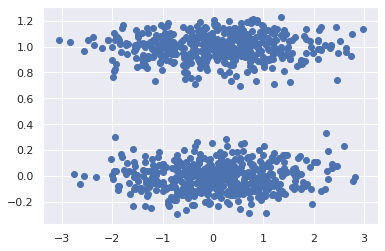

k = 2 , n_iter = 3 , runtime =  17.11 ms
k = 3 , n_iter = 5 , runtime =  28.73 ms
k = 4 , n_iter = 12 , runtime =  35.89 ms
k = 5 , n_iter = 6 , runtime =  47.83 ms
k = 6 , n_iter = 11 , runtime =  50.67 ms
k = 7 , n_iter = 13 , runtime =  54.0 ms
k = 8 , n_iter = 8 , runtime =  47.85 ms
k = 9 , n_iter = 17 , runtime =  53.16 ms
k = 10 , n_iter = 29 , runtime =  58.08 ms

long2.arff


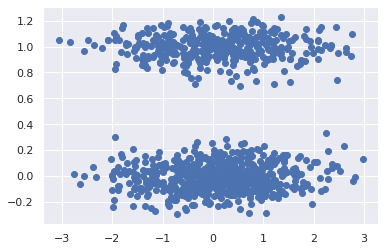

k = 2 , n_iter = 3 , runtime =  17.09 ms
k = 3 , n_iter = 5 , runtime =  29.34 ms
k = 4 , n_iter = 12 , runtime =  36.99 ms
k = 5 , n_iter = 6 , runtime =  47.95 ms
k = 6 , n_iter = 11 , runtime =  50.16 ms
k = 7 , n_iter = 13 , runtime =  54.37 ms
k = 8 , n_iter = 8 , runtime =  48.1 ms
k = 9 , n_iter = 17 , runtime =  54.0 ms
k = 10 , n_iter = 29 , runtime =  59.09 ms

long3.arff


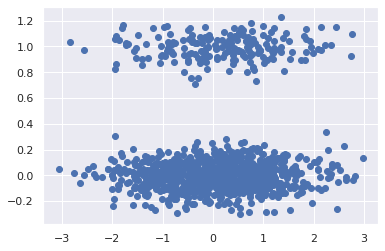

k = 2 , n_iter = 3 , runtime =  16.86 ms
k = 3 , n_iter = 5 , runtime =  29.07 ms
k = 4 , n_iter = 12 , runtime =  35.83 ms
k = 5 , n_iter = 6 , runtime =  48.27 ms
k = 6 , n_iter = 11 , runtime =  50.63 ms
k = 7 , n_iter = 13 , runtime =  54.66 ms
k = 8 , n_iter = 8 , runtime =  48.38 ms
k = 9 , n_iter = 17 , runtime =  54.54 ms
k = 10 , n_iter = 29 , runtime =  57.39 ms

longsquare.arff


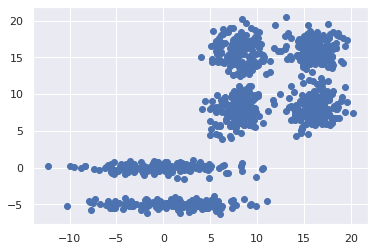

k = 2 , n_iter = 3 , runtime =  17.05 ms
k = 3 , n_iter = 5 , runtime =  28.54 ms
k = 4 , n_iter = 12 , runtime =  37.24 ms
k = 5 , n_iter = 6 , runtime =  48.8 ms
k = 6 , n_iter = 11 , runtime =  52.24 ms
k = 7 , n_iter = 13 , runtime =  54.89 ms
k = 8 , n_iter = 8 , runtime =  48.29 ms
k = 9 , n_iter = 17 , runtime =  54.52 ms
k = 10 , n_iter = 29 , runtime =  57.9 ms

lsun.arff


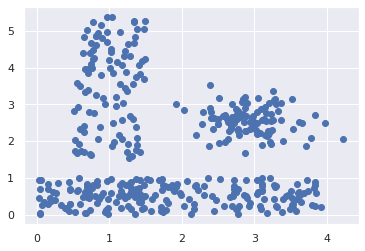

k = 2 , n_iter = 3 , runtime =  17.15 ms
k = 3 , n_iter = 5 , runtime =  28.52 ms
k = 4 , n_iter = 12 , runtime =  36.77 ms
k = 5 , n_iter = 6 , runtime =  47.74 ms
k = 6 , n_iter = 11 , runtime =  50.67 ms
k = 7 , n_iter = 13 , runtime =  54.23 ms
k = 8 , n_iter = 8 , runtime =  48.13 ms
k = 9 , n_iter = 17 , runtime =  53.6 ms
k = 10 , n_iter = 29 , runtime =  58.0 ms

mopsi-finland.arff


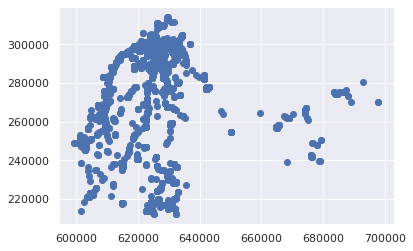

k = 2 , n_iter = 3 , runtime =  17.18 ms
k = 3 , n_iter = 5 , runtime =  28.76 ms
k = 4 , n_iter = 12 , runtime =  36.07 ms
k = 5 , n_iter = 6 , runtime =  48.21 ms
k = 6 , n_iter = 11 , runtime =  50.78 ms
k = 7 , n_iter = 13 , runtime =  54.87 ms
k = 8 , n_iter = 8 , runtime =  48.26 ms
k = 9 , n_iter = 17 , runtime =  53.43 ms
k = 10 , n_iter = 29 , runtime =  57.85 ms

mopsi-joensuu.arff


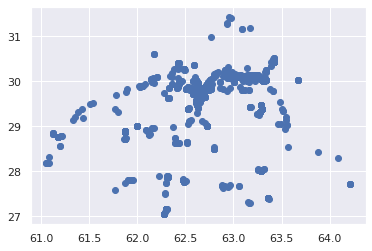

k = 2 , n_iter = 3 , runtime =  17.05 ms
k = 3 , n_iter = 5 , runtime =  27.43 ms
k = 4 , n_iter = 12 , runtime =  35.93 ms
k = 5 , n_iter = 6 , runtime =  48.18 ms
k = 6 , n_iter = 11 , runtime =  52.11 ms
k = 7 , n_iter = 13 , runtime =  54.74 ms
k = 8 , n_iter = 8 , runtime =  48.22 ms
k = 9 , n_iter = 17 , runtime =  54.06 ms
k = 10 , n_iter = 29 , runtime =  57.95 ms

pathbased.arff


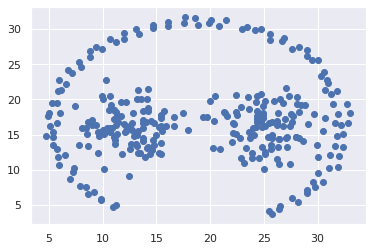

k = 2 , n_iter = 3 , runtime =  17.13 ms
k = 3 , n_iter = 5 , runtime =  28.76 ms
k = 4 , n_iter = 12 , runtime =  36.9 ms
k = 5 , n_iter = 6 , runtime =  47.74 ms
k = 6 , n_iter = 11 , runtime =  50.98 ms
k = 7 , n_iter = 13 , runtime =  54.9 ms
k = 8 , n_iter = 8 , runtime =  46.8 ms
k = 9 , n_iter = 17 , runtime =  54.5 ms
k = 10 , n_iter = 29 , runtime =  65.93 ms

pmf.arff


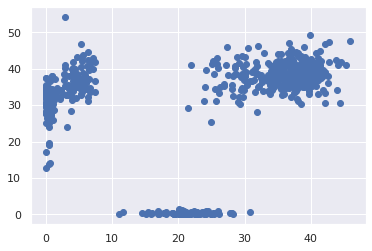

k = 2 , n_iter = 3 , runtime =  18.85 ms
k = 3 , n_iter = 5 , runtime =  31.11 ms
k = 4 , n_iter = 12 , runtime =  40.03 ms
k = 5 , n_iter = 6 , runtime =  49.35 ms
k = 6 , n_iter = 11 , runtime =  51.84 ms
k = 7 , n_iter = 13 , runtime =  54.78 ms
k = 8 , n_iter = 8 , runtime =  48.22 ms
k = 9 , n_iter = 17 , runtime =  54.36 ms
k = 10 , n_iter = 29 , runtime =  58.17 ms

rings.arff


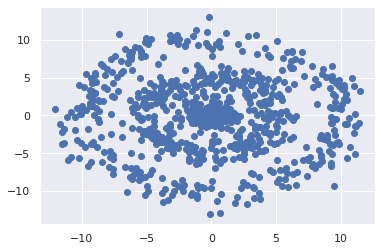

k = 2 , n_iter = 3 , runtime =  17.15 ms
k = 3 , n_iter = 5 , runtime =  28.91 ms
k = 4 , n_iter = 12 , runtime =  35.69 ms
k = 5 , n_iter = 6 , runtime =  47.49 ms
k = 6 , n_iter = 11 , runtime =  49.55 ms
k = 7 , n_iter = 13 , runtime =  55.74 ms
k = 8 , n_iter = 8 , runtime =  48.09 ms
k = 9 , n_iter = 17 , runtime =  54.26 ms
k = 10 , n_iter = 29 , runtime =  58.14 ms

s-set1.arff


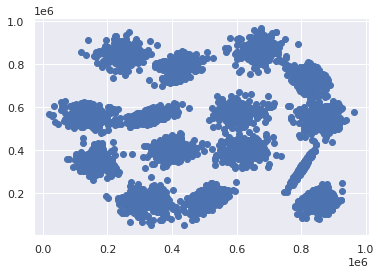

k = 2 , n_iter = 3 , runtime =  17.06 ms
k = 3 , n_iter = 5 , runtime =  27.87 ms
k = 4 , n_iter = 12 , runtime =  36.97 ms
k = 5 , n_iter = 6 , runtime =  48.06 ms
k = 6 , n_iter = 11 , runtime =  50.96 ms
k = 7 , n_iter = 13 , runtime =  54.47 ms
k = 8 , n_iter = 8 , runtime =  47.98 ms
k = 9 , n_iter = 17 , runtime =  54.12 ms
k = 10 , n_iter = 29 , runtime =  58.03 ms

s-set2.arff


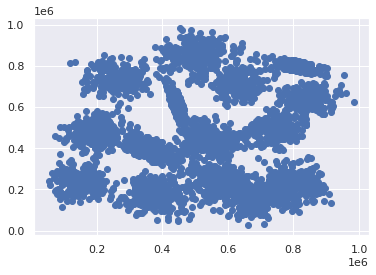

k = 2 , n_iter = 3 , runtime =  17.37 ms
k = 3 , n_iter = 5 , runtime =  28.84 ms
k = 4 , n_iter = 12 , runtime =  37.46 ms
k = 5 , n_iter = 6 , runtime =  48.14 ms
k = 6 , n_iter = 11 , runtime =  49.81 ms
k = 7 , n_iter = 13 , runtime =  53.8 ms
k = 8 , n_iter = 8 , runtime =  47.86 ms
k = 9 , n_iter = 17 , runtime =  56.04 ms
k = 10 , n_iter = 29 , runtime =  58.56 ms

s-set3.arff


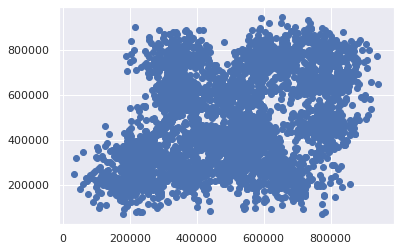

k = 2 , n_iter = 3 , runtime =  17.02 ms
k = 3 , n_iter = 5 , runtime =  27.61 ms
k = 4 , n_iter = 12 , runtime =  36.59 ms
k = 5 , n_iter = 6 , runtime =  47.97 ms
k = 6 , n_iter = 11 , runtime =  50.39 ms
k = 7 , n_iter = 13 , runtime =  53.46 ms
k = 8 , n_iter = 8 , runtime =  47.77 ms
k = 9 , n_iter = 17 , runtime =  52.97 ms
k = 10 , n_iter = 29 , runtime =  57.37 ms

s-set4.arff


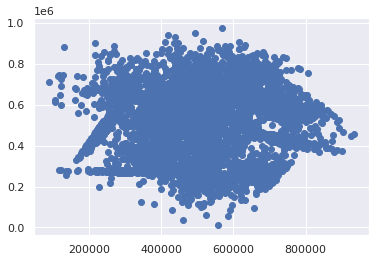

k = 2 , n_iter = 3 , runtime =  17.02 ms
k = 3 , n_iter = 5 , runtime =  28.61 ms
k = 4 , n_iter = 12 , runtime =  38.17 ms
k = 5 , n_iter = 6 , runtime =  49.05 ms
k = 6 , n_iter = 11 , runtime =  49.6 ms
k = 7 , n_iter = 13 , runtime =  54.51 ms
k = 8 , n_iter = 8 , runtime =  48.0 ms
k = 9 , n_iter = 17 , runtime =  53.27 ms
k = 10 , n_iter = 29 , runtime =  58.23 ms

shapes.arff


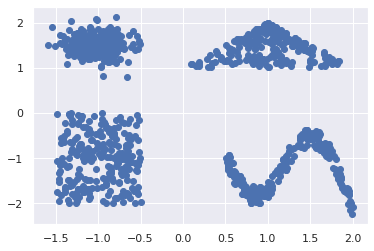

k = 2 , n_iter = 3 , runtime =  17.03 ms
k = 3 , n_iter = 5 , runtime =  28.36 ms
k = 4 , n_iter = 12 , runtime =  36.9 ms
k = 5 , n_iter = 6 , runtime =  46.65 ms
k = 6 , n_iter = 11 , runtime =  50.83 ms
k = 7 , n_iter = 13 , runtime =  54.13 ms
k = 8 , n_iter = 8 , runtime =  47.75 ms
k = 9 , n_iter = 17 , runtime =  53.72 ms
k = 10 , n_iter = 29 , runtime =  57.67 ms

simplex.arff


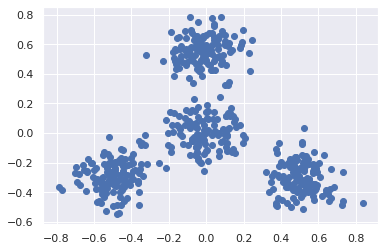

k = 2 , n_iter = 3 , runtime =  17.45 ms
k = 3 , n_iter = 5 , runtime =  27.47 ms
k = 4 , n_iter = 12 , runtime =  36.67 ms
k = 5 , n_iter = 6 , runtime =  47.72 ms
k = 6 , n_iter = 11 , runtime =  50.54 ms
k = 7 , n_iter = 13 , runtime =  54.38 ms
k = 8 , n_iter = 8 , runtime =  46.91 ms
k = 9 , n_iter = 17 , runtime =  52.85 ms
k = 10 , n_iter = 29 , runtime =  56.22 ms

sizes1.arff


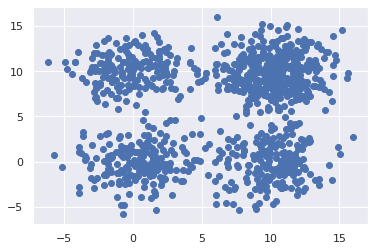

k = 2 , n_iter = 3 , runtime =  17.27 ms
k = 3 , n_iter = 5 , runtime =  29.09 ms
k = 4 , n_iter = 12 , runtime =  36.86 ms
k = 5 , n_iter = 6 , runtime =  47.99 ms
k = 6 , n_iter = 11 , runtime =  49.57 ms
k = 7 , n_iter = 13 , runtime =  54.81 ms
k = 8 , n_iter = 8 , runtime =  48.09 ms
k = 9 , n_iter = 17 , runtime =  54.45 ms
k = 10 , n_iter = 29 , runtime =  58.11 ms

sizes2.arff


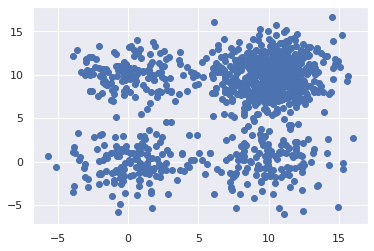

k = 2 , n_iter = 3 , runtime =  16.89 ms
k = 3 , n_iter = 5 , runtime =  29.09 ms
k = 4 , n_iter = 12 , runtime =  36.9 ms
k = 5 , n_iter = 6 , runtime =  47.97 ms
k = 6 , n_iter = 11 , runtime =  50.36 ms
k = 7 , n_iter = 13 , runtime =  54.22 ms
k = 8 , n_iter = 8 , runtime =  47.62 ms
k = 9 , n_iter = 17 , runtime =  54.09 ms
k = 10 , n_iter = 29 , runtime =  58.75 ms

sizes3.arff


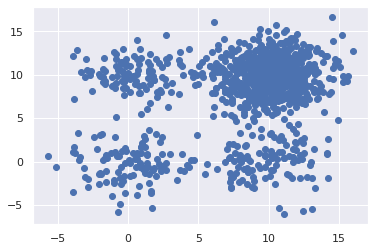

k = 2 , n_iter = 3 , runtime =  16.97 ms
k = 3 , n_iter = 5 , runtime =  28.61 ms
k = 4 , n_iter = 12 , runtime =  36.84 ms
k = 5 , n_iter = 6 , runtime =  48.02 ms
k = 6 , n_iter = 11 , runtime =  51.22 ms
k = 7 , n_iter = 13 , runtime =  54.36 ms
k = 8 , n_iter = 8 , runtime =  46.71 ms
k = 9 , n_iter = 17 , runtime =  54.14 ms
k = 10 , n_iter = 29 , runtime =  57.7 ms

sizes4.arff


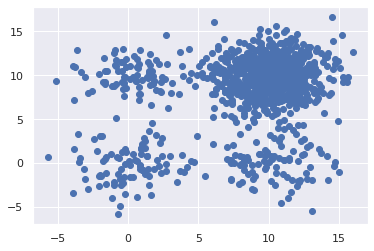

k = 2 , n_iter = 3 , runtime =  17.42 ms
k = 3 , n_iter = 5 , runtime =  28.25 ms
k = 4 , n_iter = 12 , runtime =  37.45 ms
k = 5 , n_iter = 6 , runtime =  63.7 ms
k = 6 , n_iter = 11 , runtime =  54.1 ms
k = 7 , n_iter = 13 , runtime =  59.25 ms
k = 8 , n_iter = 8 , runtime =  50.31 ms
k = 9 , n_iter = 17 , runtime =  56.67 ms
k = 10 , n_iter = 29 , runtime =  61.29 ms

sizes5.arff


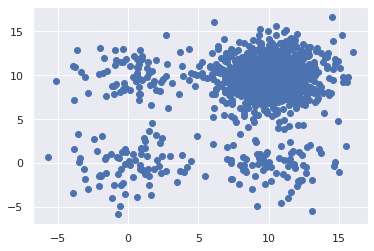

k = 2 , n_iter = 4 , runtime =  17.49 ms
k = 3 , n_iter = 5 , runtime =  28.71 ms
k = 4 , n_iter = 12 , runtime =  35.66 ms
k = 5 , n_iter = 6 , runtime =  48.3 ms
k = 6 , n_iter = 11 , runtime =  52.08 ms
k = 7 , n_iter = 13 , runtime =  55.89 ms
k = 8 , n_iter = 8 , runtime =  46.74 ms
k = 9 , n_iter = 17 , runtime =  53.04 ms
k = 10 , n_iter = 29 , runtime =  58.54 ms

smile1.arff


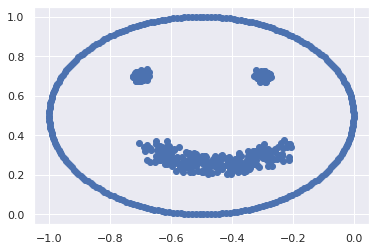

k = 2 , n_iter = 3 , runtime =  17.24 ms
k = 3 , n_iter = 5 , runtime =  28.64 ms
k = 4 , n_iter = 12 , runtime =  38.16 ms
k = 5 , n_iter = 6 , runtime =  46.3 ms
k = 6 , n_iter = 11 , runtime =  50.52 ms
k = 7 , n_iter = 13 , runtime =  54.29 ms
k = 8 , n_iter = 8 , runtime =  47.56 ms
k = 9 , n_iter = 17 , runtime =  52.57 ms
k = 10 , n_iter = 29 , runtime =  57.58 ms

smile2.arff


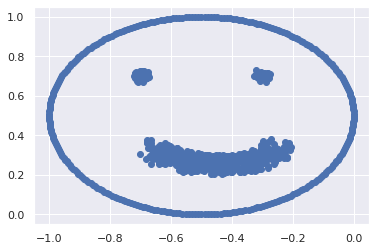

k = 2 , n_iter = 3 , runtime =  16.85 ms
k = 3 , n_iter = 5 , runtime =  28.74 ms
k = 4 , n_iter = 12 , runtime =  36.75 ms
k = 5 , n_iter = 6 , runtime =  47.17 ms
k = 6 , n_iter = 11 , runtime =  50.37 ms
k = 7 , n_iter = 13 , runtime =  52.78 ms
k = 8 , n_iter = 8 , runtime =  47.45 ms
k = 9 , n_iter = 17 , runtime =  52.65 ms
k = 10 , n_iter = 29 , runtime =  56.56 ms

smile3.arff


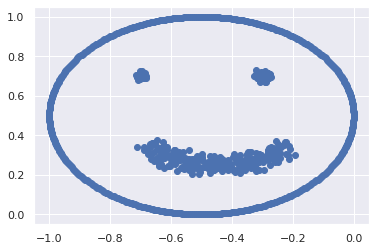

k = 2 , n_iter = 3 , runtime =  17.46 ms
k = 3 , n_iter = 5 , runtime =  28.92 ms
k = 4 , n_iter = 12 , runtime =  36.86 ms
k = 5 , n_iter = 6 , runtime =  47.56 ms
k = 6 , n_iter = 11 , runtime =  50.84 ms
k = 7 , n_iter = 13 , runtime =  54.99 ms
k = 8 , n_iter = 8 , runtime =  49.32 ms
k = 9 , n_iter = 17 , runtime =  54.83 ms
k = 10 , n_iter = 29 , runtime =  58.28 ms

spherical_4_3.arff


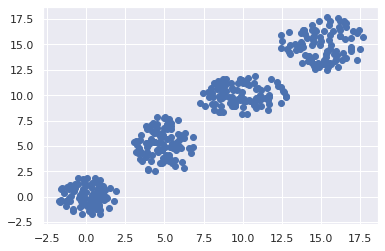

k = 2 , n_iter = 3 , runtime =  17.5 ms
k = 3 , n_iter = 5 , runtime =  28.75 ms
k = 4 , n_iter = 12 , runtime =  36.41 ms
k = 5 , n_iter = 6 , runtime =  46.71 ms
k = 6 , n_iter = 11 , runtime =  50.18 ms
k = 7 , n_iter = 13 , runtime =  54.52 ms
k = 8 , n_iter = 8 , runtime =  48.1 ms
k = 9 , n_iter = 17 , runtime =  54.64 ms
k = 10 , n_iter = 29 , runtime =  58.38 ms

spherical_5_2.arff


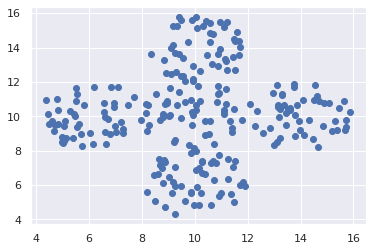

k = 2 , n_iter = 3 , runtime =  17.18 ms
k = 3 , n_iter = 5 , runtime =  28.82 ms
k = 4 , n_iter = 12 , runtime =  36.85 ms
k = 5 , n_iter = 6 , runtime =  49.47 ms
k = 6 , n_iter = 11 , runtime =  50.44 ms
k = 7 , n_iter = 13 , runtime =  54.44 ms
k = 8 , n_iter = 8 , runtime =  47.95 ms
k = 9 , n_iter = 17 , runtime =  53.29 ms
k = 10 , n_iter = 29 , runtime =  58.5 ms

spherical_6_2.arff


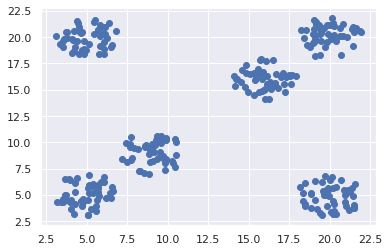

k = 2 , n_iter = 3 , runtime =  17.3 ms
k = 3 , n_iter = 5 , runtime =  28.74 ms
k = 4 , n_iter = 12 , runtime =  36.7 ms
k = 5 , n_iter = 6 , runtime =  47.71 ms
k = 6 , n_iter = 11 , runtime =  49.91 ms
k = 7 , n_iter = 13 , runtime =  54.3 ms
k = 8 , n_iter = 8 , runtime =  48.3 ms
k = 9 , n_iter = 17 , runtime =  54.28 ms
k = 10 , n_iter = 29 , runtime =  58.11 ms

spiral.arff


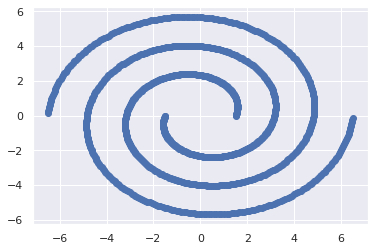

k = 2 , n_iter = 3 , runtime =  17.1 ms
k = 3 , n_iter = 5 , runtime =  28.85 ms
k = 4 , n_iter = 12 , runtime =  37.2 ms
k = 5 , n_iter = 6 , runtime =  47.93 ms
k = 6 , n_iter = 11 , runtime =  50.77 ms
k = 7 , n_iter = 13 , runtime =  55.02 ms
k = 8 , n_iter = 8 , runtime =  48.19 ms
k = 9 , n_iter = 17 , runtime =  55.02 ms
k = 10 , n_iter = 29 , runtime =  58.73 ms

spiralsquare.arff


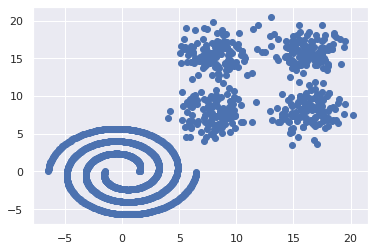

k = 2 , n_iter = 3 , runtime =  17.52 ms
k = 3 , n_iter = 5 , runtime =  29.39 ms
k = 4 , n_iter = 12 , runtime =  36.72 ms
k = 5 , n_iter = 6 , runtime =  47.41 ms
k = 6 , n_iter = 11 , runtime =  50.77 ms
k = 7 , n_iter = 13 , runtime =  54.56 ms
k = 8 , n_iter = 8 , runtime =  48.05 ms
k = 9 , n_iter = 17 , runtime =  53.17 ms
k = 10 , n_iter = 29 , runtime =  58.81 ms

square1.arff


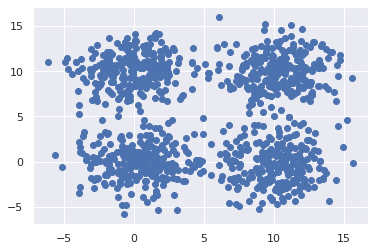

k = 2 , n_iter = 3 , runtime =  17.21 ms
k = 3 , n_iter = 5 , runtime =  28.72 ms
k = 4 , n_iter = 12 , runtime =  36.51 ms
k = 5 , n_iter = 6 , runtime =  47.91 ms
k = 6 , n_iter = 11 , runtime =  50.28 ms
k = 7 , n_iter = 13 , runtime =  55.46 ms
k = 8 , n_iter = 8 , runtime =  47.76 ms
k = 9 , n_iter = 17 , runtime =  54.39 ms
k = 10 , n_iter = 29 , runtime =  57.1 ms

square2.arff


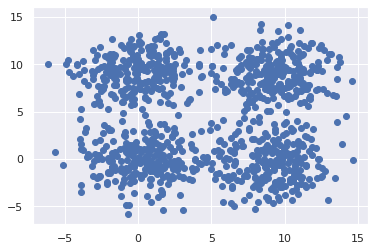

k = 2 , n_iter = 3 , runtime =  17.41 ms
k = 3 , n_iter = 5 , runtime =  28.91 ms
k = 4 , n_iter = 12 , runtime =  37.29 ms
k = 5 , n_iter = 6 , runtime =  47.2 ms
k = 6 , n_iter = 11 , runtime =  51.53 ms
k = 7 , n_iter = 13 , runtime =  54.23 ms
k = 8 , n_iter = 8 , runtime =  46.82 ms
k = 9 , n_iter = 17 , runtime =  54.45 ms
k = 10 , n_iter = 29 , runtime =  57.98 ms

square3.arff


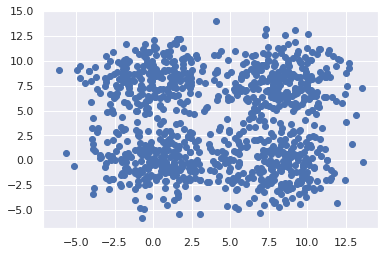

k = 2 , n_iter = 3 , runtime =  17.45 ms
k = 3 , n_iter = 5 , runtime =  28.17 ms
k = 4 , n_iter = 12 , runtime =  36.32 ms
k = 5 , n_iter = 6 , runtime =  47.93 ms
k = 6 , n_iter = 11 , runtime =  50.25 ms
k = 7 , n_iter = 13 , runtime =  53.54 ms
k = 8 , n_iter = 8 , runtime =  49.13 ms
k = 9 , n_iter = 17 , runtime =  54.31 ms
k = 10 , n_iter = 29 , runtime =  57.24 ms

square4.arff


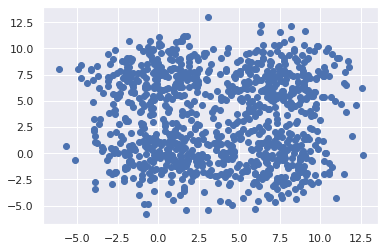

k = 2 , n_iter = 3 , runtime =  17.46 ms
k = 3 , n_iter = 5 , runtime =  28.35 ms
k = 4 , n_iter = 12 , runtime =  36.8 ms
k = 5 , n_iter = 6 , runtime =  47.76 ms
k = 6 , n_iter = 11 , runtime =  50.2 ms
k = 7 , n_iter = 13 , runtime =  53.5 ms
k = 8 , n_iter = 8 , runtime =  46.7 ms
k = 9 , n_iter = 17 , runtime =  54.66 ms
k = 10 , n_iter = 29 , runtime =  58.27 ms

square5.arff


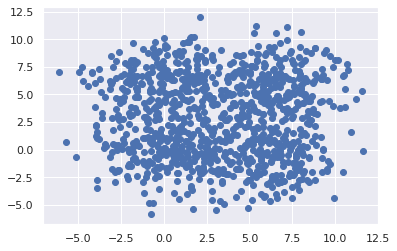

k = 2 , n_iter = 3 , runtime =  17.35 ms
k = 3 , n_iter = 5 , runtime =  29.01 ms
k = 4 , n_iter = 12 , runtime =  41.77 ms
k = 5 , n_iter = 6 , runtime =  50.35 ms
k = 6 , n_iter = 11 , runtime =  56.66 ms
k = 7 , n_iter = 13 , runtime =  60.2 ms
k = 8 , n_iter = 8 , runtime =  55.91 ms
k = 9 , n_iter = 17 , runtime =  59.25 ms
k = 10 , n_iter = 29 , runtime =  62.47 ms

st900.arff


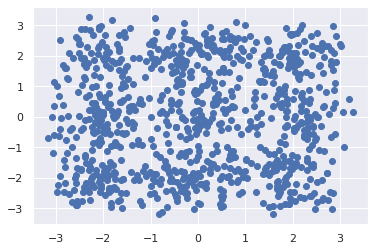

k = 2 , n_iter = 3 , runtime =  17.24 ms
k = 3 , n_iter = 5 , runtime =  29.0 ms
k = 4 , n_iter = 12 , runtime =  36.22 ms
k = 5 , n_iter = 6 , runtime =  48.94 ms
k = 6 , n_iter = 11 , runtime =  50.69 ms
k = 7 , n_iter = 13 , runtime =  53.47 ms
k = 8 , n_iter = 8 , runtime =  48.43 ms
k = 9 , n_iter = 17 , runtime =  54.18 ms
k = 10 , n_iter = 29 , runtime =  58.39 ms

target.arff


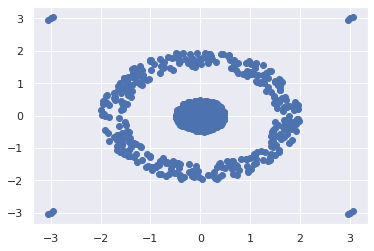

k = 2 , n_iter = 3 , runtime =  17.44 ms
k = 3 , n_iter = 5 , runtime =  27.81 ms
k = 4 , n_iter = 12 , runtime =  37.05 ms
k = 5 , n_iter = 6 , runtime =  48.43 ms
k = 6 , n_iter = 11 , runtime =  50.33 ms
k = 7 , n_iter = 13 , runtime =  55.88 ms
k = 8 , n_iter = 8 , runtime =  48.35 ms
k = 9 , n_iter = 17 , runtime =  54.48 ms
k = 10 , n_iter = 29 , runtime =  58.15 ms

tetra.arff


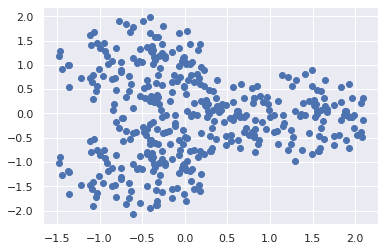

k = 2 , n_iter = 3 , runtime =  17.45 ms
k = 3 , n_iter = 5 , runtime =  27.67 ms
k = 4 , n_iter = 12 , runtime =  37.06 ms
k = 5 , n_iter = 6 , runtime =  48.17 ms
k = 6 , n_iter = 11 , runtime =  51.28 ms
k = 7 , n_iter = 13 , runtime =  56.16 ms
k = 8 , n_iter = 8 , runtime =  48.99 ms
k = 9 , n_iter = 17 , runtime =  53.25 ms
k = 10 , n_iter = 29 , runtime =  56.68 ms

threenorm.arff


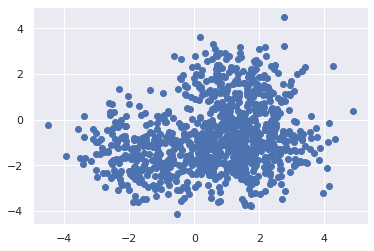

k = 2 , n_iter = 3 , runtime =  16.84 ms
k = 3 , n_iter = 5 , runtime =  29.53 ms
k = 4 , n_iter = 12 , runtime =  38.35 ms
k = 5 , n_iter = 6 , runtime =  48.22 ms
k = 6 , n_iter = 11 , runtime =  49.52 ms
k = 7 , n_iter = 13 , runtime =  53.61 ms
k = 8 , n_iter = 8 , runtime =  47.54 ms
k = 9 , n_iter = 17 , runtime =  54.46 ms
k = 10 , n_iter = 29 , runtime =  56.78 ms

triangle1.arff


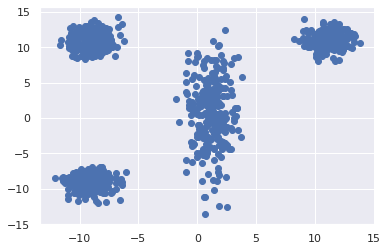

k = 2 , n_iter = 3 , runtime =  17.44 ms
k = 3 , n_iter = 5 , runtime =  28.15 ms
k = 4 , n_iter = 12 , runtime =  36.49 ms
k = 5 , n_iter = 6 , runtime =  47.81 ms
k = 6 , n_iter = 11 , runtime =  50.4 ms
k = 7 , n_iter = 13 , runtime =  52.96 ms
k = 8 , n_iter = 8 , runtime =  48.08 ms
k = 9 , n_iter = 17 , runtime =  52.55 ms
k = 10 , n_iter = 29 , runtime =  57.8 ms

triangle2.arff


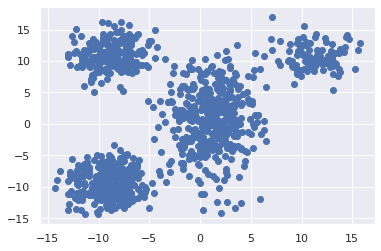

k = 2 , n_iter = 3 , runtime =  17.02 ms
k = 3 , n_iter = 5 , runtime =  29.01 ms
k = 4 , n_iter = 12 , runtime =  36.76 ms
k = 5 , n_iter = 6 , runtime =  48.2 ms
k = 6 , n_iter = 11 , runtime =  50.31 ms
k = 7 , n_iter = 13 , runtime =  53.38 ms
k = 8 , n_iter = 8 , runtime =  48.08 ms
k = 9 , n_iter = 17 , runtime =  54.21 ms
k = 10 , n_iter = 29 , runtime =  58.03 ms

twenty.arff


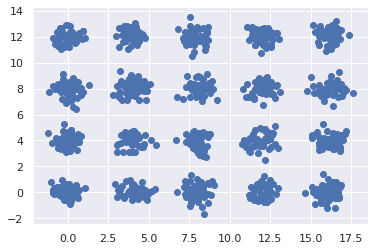

k = 2 , n_iter = 3 , runtime =  17.0 ms
k = 3 , n_iter = 5 , runtime =  28.59 ms
k = 4 , n_iter = 12 , runtime =  35.57 ms
k = 5 , n_iter = 6 , runtime =  48.32 ms
k = 6 , n_iter = 11 , runtime =  49.9 ms
k = 7 , n_iter = 13 , runtime =  54.49 ms
k = 8 , n_iter = 8 , runtime =  47.19 ms
k = 9 , n_iter = 17 , runtime =  54.94 ms
k = 10 , n_iter = 29 , runtime =  58.43 ms

twodiamonds.arff


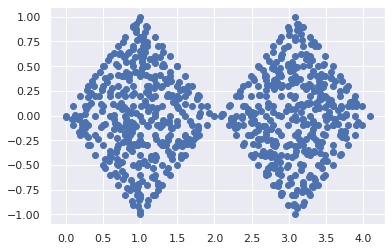

k = 2 , n_iter = 3 , runtime =  17.32 ms
k = 3 , n_iter = 5 , runtime =  29.17 ms
k = 4 , n_iter = 12 , runtime =  36.7 ms
k = 5 , n_iter = 6 , runtime =  47.67 ms
k = 6 , n_iter = 11 , runtime =  50.52 ms
k = 7 , n_iter = 13 , runtime =  53.04 ms
k = 8 , n_iter = 8 , runtime =  47.78 ms
k = 9 , n_iter = 17 , runtime =  54.11 ms
k = 10 , n_iter = 29 , runtime =  58.04 ms

wingnut.arff


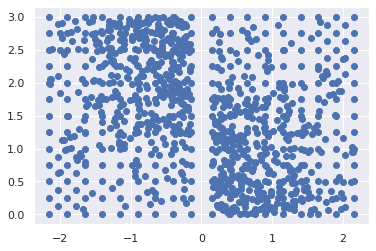

k = 2 , n_iter = 3 , runtime =  17.35 ms
k = 3 , n_iter = 5 , runtime =  28.41 ms
k = 4 , n_iter = 12 , runtime =  37.07 ms
k = 5 , n_iter = 6 , runtime =  46.69 ms
k = 6 , n_iter = 11 , runtime =  50.6 ms
k = 7 , n_iter = 13 , runtime =  54.02 ms
k = 8 , n_iter = 8 , runtime =  46.46 ms
k = 9 , n_iter = 17 , runtime =  54.25 ms
k = 10 , n_iter = 29 , runtime =  57.93 ms

xclara.arff


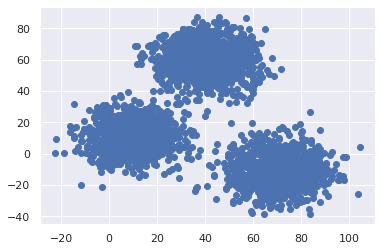

k = 2 , n_iter = 4 , runtime =  17.19 ms
k = 3 , n_iter = 5 , runtime =  28.84 ms
k = 4 , n_iter = 12 , runtime =  35.8 ms
k = 5 , n_iter = 6 , runtime =  47.99 ms
k = 6 , n_iter = 11 , runtime =  51.64 ms
k = 7 , n_iter = 13 , runtime =  54.25 ms
k = 8 , n_iter = 8 , runtime =  48.16 ms
k = 9 , n_iter = 17 , runtime =  54.4 ms
k = 10 , n_iter = 29 , runtime =  56.75 ms

xor.arff


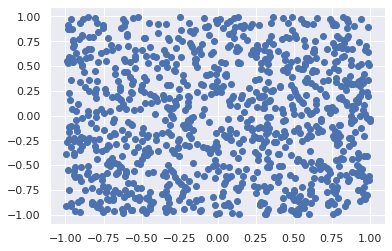

k = 2 , n_iter = 3 , runtime =  17.47 ms
k = 3 , n_iter = 5 , runtime =  28.87 ms
k = 4 , n_iter = 12 , runtime =  36.72 ms
k = 5 , n_iter = 6 , runtime =  48.08 ms
k = 6 , n_iter = 11 , runtime =  51.22 ms
k = 7 , n_iter = 13 , runtime =  54.55 ms
k = 8 , n_iter = 8 , runtime =  47.18 ms
k = 9 , n_iter = 17 , runtime =  54.4 ms
k = 10 , n_iter = 29 , runtime =  56.97 ms

zelnik1.arff


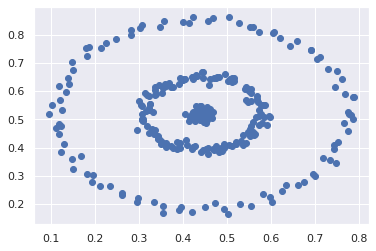

k = 2 , n_iter = 3 , runtime =  17.64 ms
k = 3 , n_iter = 5 , runtime =  28.91 ms
k = 4 , n_iter = 12 , runtime =  36.99 ms
k = 5 , n_iter = 6 , runtime =  47.51 ms
k = 6 , n_iter = 11 , runtime =  50.38 ms
k = 7 , n_iter = 13 , runtime =  54.3 ms
k = 8 , n_iter = 8 , runtime =  48.51 ms
k = 9 , n_iter = 17 , runtime =  54.97 ms
k = 10 , n_iter = 29 , runtime =  57.84 ms

zelnik2.arff


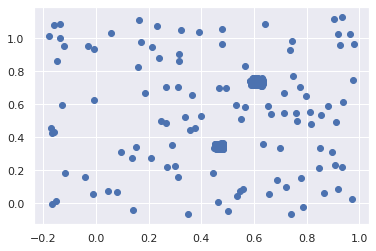

k = 2 , n_iter = 3 , runtime =  17.3 ms
k = 3 , n_iter = 5 , runtime =  29.0 ms
k = 4 , n_iter = 12 , runtime =  36.5 ms
k = 5 , n_iter = 6 , runtime =  47.32 ms
k = 6 , n_iter = 11 , runtime =  51.08 ms
k = 7 , n_iter = 13 , runtime =  53.21 ms
k = 8 , n_iter = 8 , runtime =  48.91 ms
k = 9 , n_iter = 17 , runtime =  56.31 ms
k = 10 , n_iter = 29 , runtime =  59.12 ms

zelnik3.arff


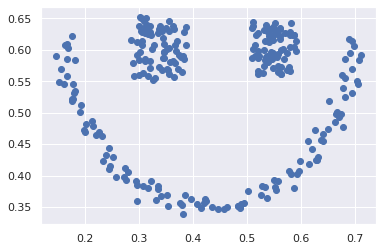

k = 2 , n_iter = 3 , runtime =  17.17 ms
k = 3 , n_iter = 5 , runtime =  28.81 ms
k = 4 , n_iter = 12 , runtime =  35.15 ms
k = 5 , n_iter = 6 , runtime =  47.93 ms
k = 6 , n_iter = 11 , runtime =  52.29 ms
k = 7 , n_iter = 13 , runtime =  54.41 ms
k = 8 , n_iter = 8 , runtime =  47.06 ms
k = 9 , n_iter = 17 , runtime =  53.1 ms
k = 10 , n_iter = 29 , runtime =  56.88 ms

zelnik4.arff


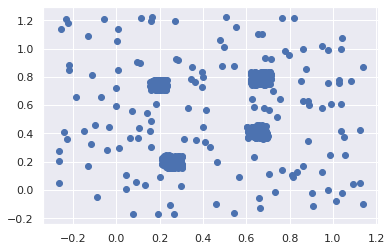

k = 2 , n_iter = 3 , runtime =  16.84 ms
k = 3 , n_iter = 5 , runtime =  28.79 ms
k = 4 , n_iter = 12 , runtime =  36.63 ms
k = 5 , n_iter = 6 , runtime =  47.34 ms
k = 6 , n_iter = 11 , runtime =  50.54 ms
k = 7 , n_iter = 13 , runtime =  55.68 ms
k = 8 , n_iter = 8 , runtime =  48.14 ms
k = 9 , n_iter = 17 , runtime =  52.84 ms
k = 10 , n_iter = 29 , runtime =  57.51 ms

zelnik5.arff


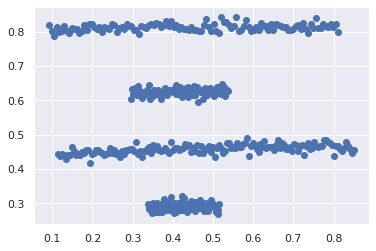

k = 2 , n_iter = 3 , runtime =  17.48 ms
k = 3 , n_iter = 5 , runtime =  28.84 ms
k = 4 , n_iter = 12 , runtime =  35.32 ms
k = 5 , n_iter = 6 , runtime =  47.76 ms
k = 6 , n_iter = 11 , runtime =  50.48 ms
k = 7 , n_iter = 13 , runtime =  54.48 ms
k = 8 , n_iter = 8 , runtime =  48.21 ms
k = 9 , n_iter = 17 , runtime =  53.16 ms
k = 10 , n_iter = 29 , runtime =  58.32 ms

zelnik6.arff


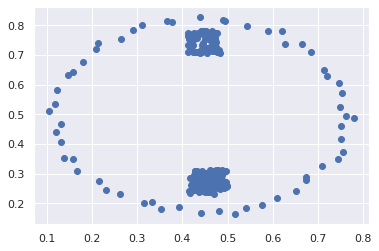

k = 2 , n_iter = 3 , runtime =  17.36 ms
k = 3 , n_iter = 5 , runtime =  29.36 ms
k = 4 , n_iter = 12 , runtime =  37.24 ms
k = 5 , n_iter = 6 , runtime =  47.98 ms
k = 6 , n_iter = 11 , runtime =  50.9 ms
k = 7 , n_iter = 13 , runtime =  54.4 ms
k = 8 , n_iter = 8 , runtime =  48.21 ms
k = 9 , n_iter = 17 , runtime =  53.12 ms
k = 10 , n_iter = 29 , runtime =  57.24 ms



In [10]:
for f in Files :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        plt.scatter(X,Y)
        plt.show()
        for k in range(2,11):
            tps1 = time.time()
            i = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(data).n_iter_    
            tps2 = time.time()
            print("k =",k,", n_iter =",i, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
        print()

## 3) Agglomerative Clustering

2d-10c.arff
k = 2 , runtime =  175.58 ms silh_score =  0.4319375426986309


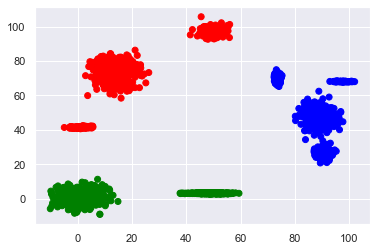

k = 3 , runtime =  193.49 ms silh_score =  0.6181693057982444
k = 4 , runtime =  176.1 ms silh_score =  0.680192656341491
k = 5 , runtime =  200.08 ms silh_score =  0.73347455779082
k = 6 , runtime =  179.27 ms silh_score =  0.6932256370018
k = 7 , runtime =  174.65 ms silh_score =  0.7375884416799317
k = 8 , runtime =  174.99 ms silh_score =  0.7569111339092157
k = 9 , runtime =  170.35 ms silh_score =  0.6856057085634313
k = 10 , runtime =  173.39 ms silh_score =  0.7088267388933748

2d-20c-no0.arff
k = 2 , runtime =  34.97 ms silh_score =  0.41574875015529406


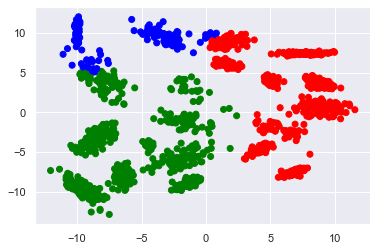

k = 3 , runtime =  36.47 ms silh_score =  0.4414390975686413
k = 4 , runtime =  39.77 ms silh_score =  0.4324233295067162
k = 5 , runtime =  35.15 ms silh_score =  0.4024261415681798
k = 6 , runtime =  35.21 ms silh_score =  0.3972035656713161
k = 7 , runtime =  37.79 ms silh_score =  0.4275697356509905
k = 8 , runtime =  35.73 ms silh_score =  0.47280126990099036
k = 9 , runtime =  37.13 ms silh_score =  0.4661305502107471
k = 10 , runtime =  38.28 ms silh_score =  0.4927579789155096

2d-3c-no123.arff
k = 2 , runtime =  9.41 ms silh_score =  0.572127416948334


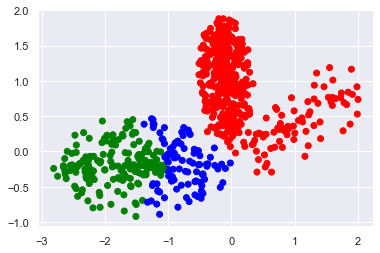

k = 3 , runtime =  9.33 ms silh_score =  0.42885619300211497
k = 4 , runtime =  11.01 ms silh_score =  0.48135159316118153
k = 5 , runtime =  10.77 ms silh_score =  0.4586676045542972
k = 6 , runtime =  9.87 ms silh_score =  0.41529235935974984
k = 7 , runtime =  8.93 ms silh_score =  0.3850673860766872
k = 8 , runtime =  11.86 ms silh_score =  0.3707285303177107
k = 9 , runtime =  9.1 ms silh_score =  0.37446247682454853
k = 10 , runtime =  9.61 ms silh_score =  0.3942611966381045

2d-4c-no4.arff
k = 2 , runtime =  13.81 ms silh_score =  0.6031512476524266


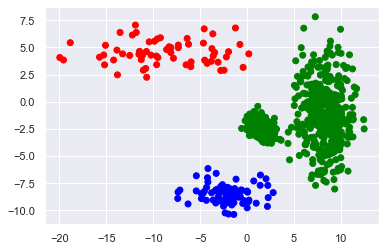

k = 3 , runtime =  12.35 ms silh_score =  0.5105228013344894
k = 4 , runtime =  17.6 ms silh_score =  0.49642104093932676
k = 5 , runtime =  14.51 ms silh_score =  0.3264388726957575
k = 6 , runtime =  15.22 ms silh_score =  0.5475769476173975
k = 7 , runtime =  13.56 ms silh_score =  0.5535831225181571
k = 8 , runtime =  13.0 ms silh_score =  0.535732240415105
k = 9 , runtime =  12.49 ms silh_score =  0.5109574602254289
k = 10 , runtime =  13.51 ms silh_score =  0.4893217442204792

2d-4c-no9.arff
k = 2 , runtime =  16.94 ms silh_score =  0.5402658208301628


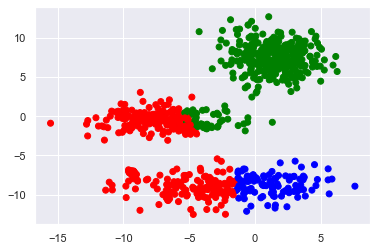

k = 3 , runtime =  13.72 ms silh_score =  0.46707031215657885
k = 4 , runtime =  18.43 ms silh_score =  0.5049060564958274
k = 5 , runtime =  13.86 ms silh_score =  0.4970748064719576
k = 6 , runtime =  13.58 ms silh_score =  0.35345360541259035
k = 7 , runtime =  13.71 ms silh_score =  0.3356497193820692
k = 8 , runtime =  13.38 ms silh_score =  0.36975193334026074
k = 9 , runtime =  13.39 ms silh_score =  0.3824037179967936
k = 10 , runtime =  13.97 ms silh_score =  0.3677499654081381

2d-4c.arff
k = 2 , runtime =  27.52 ms silh_score =  0.7232948842289767


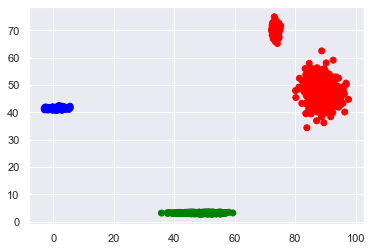

k = 3 , runtime =  25.08 ms silh_score =  0.8663200072095998
k = 4 , runtime =  25.8 ms silh_score =  0.8670311065845322
k = 5 , runtime =  23.94 ms silh_score =  0.6710321765035772
k = 6 , runtime =  24.29 ms silh_score =  0.5261128060242968
k = 7 , runtime =  25.25 ms silh_score =  0.4994643565448922
k = 8 , runtime =  27.64 ms silh_score =  0.5123582330078644
k = 9 , runtime =  25.15 ms silh_score =  0.5066276657748552
k = 10 , runtime =  24.54 ms silh_score =  0.4938613980384086

2dnormals.arff
k = 2 , runtime =  21.57 ms silh_score =  0.43025720333245915


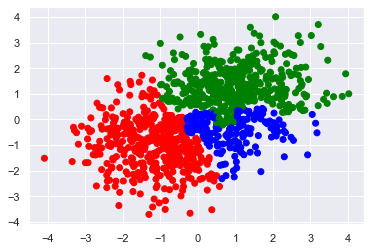

k = 3 , runtime =  19.91 ms silh_score =  0.297763956457174
k = 4 , runtime =  24.91 ms silh_score =  0.27327519889824653
k = 5 , runtime =  19.33 ms silh_score =  0.2628412870596168
k = 6 , runtime =  19.28 ms silh_score =  0.23964172359214606
k = 7 , runtime =  19.54 ms silh_score =  0.2178764479565588
k = 8 , runtime =  19.42 ms silh_score =  0.21245953788543762
k = 9 , runtime =  19.59 ms silh_score =  0.1895403953359053
k = 10 , runtime =  20.37 ms silh_score =  0.1850722124835892

2sp2glob.arff
k = 2 , runtime =  57.16 ms silh_score =  0.662270906036177


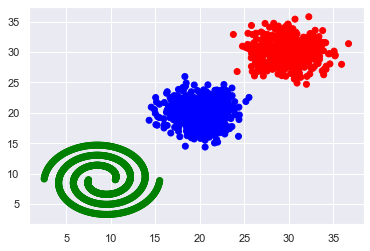

k = 3 , runtime =  64.9 ms silh_score =  0.6958375349228363
k = 4 , runtime =  59.89 ms silh_score =  0.5764926538986449
k = 5 , runtime =  57.85 ms silh_score =  0.3910947939362376
k = 6 , runtime =  55.46 ms silh_score =  0.2896197523495963
k = 7 , runtime =  56.81 ms silh_score =  0.2325709207247143
k = 8 , runtime =  58.76 ms silh_score =  0.2818544729935752
k = 9 , runtime =  57.66 ms silh_score =  0.2679143828042738
k = 10 , runtime =  58.52 ms silh_score =  0.261876362818493

3-spiral.arff
k = 2 , runtime =  2.81 ms silh_score =  0.2897696590489686


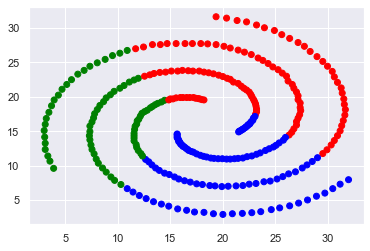

k = 3 , runtime =  2.24 ms silh_score =  0.34553575996045643
k = 4 , runtime =  2.67 ms silh_score =  0.32605392691889096
k = 5 , runtime =  2.69 ms silh_score =  0.28419427076021664
k = 6 , runtime =  3.11 ms silh_score =  0.27423389620586947
k = 7 , runtime =  3.49 ms silh_score =  0.24377015059973653
k = 8 , runtime =  2.12 ms silh_score =  0.278349988128254
k = 9 , runtime =  2.21 ms silh_score =  0.2782919585587638
k = 10 , runtime =  2.2 ms silh_score =  0.2723980271392749



In [9]:
colormap=np.array(['Red','green','blue'])
for f in Files[:10] :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        data = np.array([(x[0],x[1]) for x in data_brutes])

        for k in range(2,11):
            tps1 = time.clock()
            model = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage="complete").fit(data) #linkage = single, average, complete, ward
            tps2 = time.clock()
            silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
            if k == 3:
                plt.scatter(X,Y, c=colormap[model.labels_])
                plt.show()
            print("k =",k,", runtime = ", round((tps2 - tps1)*1000,2),"ms","silh_score = ",silh)
        print()

## 4) DBSCAN

In [ ]:
colormap=np.array(['Red','green','blue'])

for f in Files[:3] :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        data = np.array([(x[0],x[1]) for x in data_brutes])
        params = []
        silhs = []
        for ms in range(2,11):
            for eps_i in range(2,10):
                eps = eps_i/10
                tps1 = time.clock()
                model = DBSCAN(eps=eps,min_samples=ms, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(data)
                tps2 = time.clock()
                print(model.labels_)
                silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
                print("min-sample =",ms,"eps =",eps,", runtime = ", round((tps2 - tps1)*1000,2),"ms","silh_score = ",silh)
                params.append((ms,eps))
                silhs.append(silh)
            print()
        print("meilleurs résultats pour le couple (min-sample, eps) = ",params[np.argmax(silhs)])    
        print()

## 5) HDBSCAN

In [15]:
colormap=np.array(['Red','green','blue'])

for f in Files[:3] :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        data = np.array([(x[0],x[1]) for x in data_brutes])
        params = []
        silhs = []
        for ms in range(2,11):
            for eps_i in range(2,10):
                eps = eps_i/10
                tps1 = time.time()
                model = hdbscan.HDBSCAN(min_cluster_size=10)#(eps=eps,min_samples=ms, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(data)
                labels = model.fit_predict(data)
                tps2 = time.time()
                silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
                print("min-sample =",ms,"eps =",eps,", runtime = ", round((tps2 - tps1)*1000,2),"ms","silh_score = ",silh)
                params.append((ms,eps))
                silhs.append(silh)
            print()
        print("meilleurs résultats pour le couple (min-sample, eps) = ",params[np.argmax(silhs)])    
        print()

2d-10c.arff
min-sample = 2 eps = 0.2 , runtime =  89.54 ms silh_score =  0.8374016743635769
min-sample = 2 eps = 0.3 , runtime =  48.14 ms silh_score =  0.8374016743635769
min-sample = 2 eps = 0.4 , runtime =  49.64 ms silh_score =  0.8374016743635769
min-sample = 2 eps = 0.5 , runtime =  47.33 ms silh_score =  0.8374016743635769
min-sample = 2 eps = 0.6 , runtime =  49.47 ms silh_score =  0.8374016743635769
min-sample = 2 eps = 0.7 , runtime =  48.08 ms silh_score =  0.8374016743635769
min-sample = 2 eps = 0.8 , runtime =  48.44 ms silh_score =  0.8374016743635769
min-sample = 2 eps = 0.9 , runtime =  47.47 ms silh_score =  0.8374016743635769

min-sample = 3 eps = 0.2 , runtime =  51.31 ms silh_score =  0.8374016743635769
min-sample = 3 eps = 0.3 , runtime =  47.71 ms silh_score =  0.8374016743635769
min-sample = 3 eps = 0.4 , runtime =  51.39 ms silh_score =  0.8374016743635769
min-sample = 3 eps = 0.5 , runtime =  46.84 ms silh_score =  0.8374016743635769
min-sample = 3 eps = 0.6 , 

min-sample = 6 eps = 0.2 , runtime =  25.57 ms silh_score =  0.6275540649486154
min-sample = 6 eps = 0.3 , runtime =  24.71 ms silh_score =  0.6275540649486154
min-sample = 6 eps = 0.4 , runtime =  24.41 ms silh_score =  0.6275540649486154
min-sample = 6 eps = 0.5 , runtime =  24.18 ms silh_score =  0.6275540649486154
min-sample = 6 eps = 0.6 , runtime =  23.75 ms silh_score =  0.6275540649486154
min-sample = 6 eps = 0.7 , runtime =  24.41 ms silh_score =  0.6275540649486154
min-sample = 6 eps = 0.8 , runtime =  24.33 ms silh_score =  0.6275540649486154
min-sample = 6 eps = 0.9 , runtime =  25.08 ms silh_score =  0.6275540649486154

min-sample = 7 eps = 0.2 , runtime =  24.65 ms silh_score =  0.6275540649486154
min-sample = 7 eps = 0.3 , runtime =  23.99 ms silh_score =  0.6275540649486154
min-sample = 7 eps = 0.4 , runtime =  24.32 ms silh_score =  0.6275540649486154
min-sample = 7 eps = 0.5 , runtime =  26.19 ms silh_score =  0.6275540649486154
min-sample = 7 eps = 0.6 , runtime =  2

min-sample = 10 eps = 0.4 , runtime =  67.21 ms silh_score =  0.3641773188608229
min-sample = 10 eps = 0.5 , runtime =  13.71 ms silh_score =  0.3641773188608229
min-sample = 10 eps = 0.6 , runtime =  16.84 ms silh_score =  0.3641773188608229
min-sample = 10 eps = 0.7 , runtime =  13.33 ms silh_score =  0.3641773188608229
min-sample = 10 eps = 0.8 , runtime =  18.28 ms silh_score =  0.3641773188608229
min-sample = 10 eps = 0.9 , runtime =  12.07 ms silh_score =  0.3641773188608229

meilleurs résultats pour le couple (min-sample, eps) =  (2, 0.2)

